# Hackathon 1

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

Downloaded the CarPrice analysis dataset from Kaggle and uploaded it onto gitpod

## Inputs

* import numpy as np
* import pandas as pd
* import matplotlib.pyplot as plt
* import seaborn as sns
* sns.set_style('whitegrid')

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1'

# Section 1 - Importing libraries and Data Set

Import all the packages and the Feature enigne needed to perform the analysis on the dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
import plotly.express as px
from scipy.stats import f_oneway
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import OneHotEncoder

In [8]:
df = pd.read_csv('CarPrice_Assignment.csv')

#### *Checking what the data looks like*

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.shape

(205, 26)

There are 205 entries. Some of the columns are not factors in determining price so I will drop them from the dataset. I will drop CarName as well for now as it has too many unique elements. Later on I will make a column that shows the brand and it's affect on the price

In [11]:
df = df.drop(columns=['car_ID','symboling'], axis=1)


---

# Section 2

### Cleaning data and reducing features

In [12]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# Extract brand using string methods. This will be saved for later
df['brand'] = df['CarName'].str.split().str[0] 

print(df['brand'])
df['brand'].unique()

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# Check for missing data
df.isnull().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

Since there is no missing data, I will move onto the next step. There are too many columns and to perform the analysis more effectively I will systematically remove the ones that don't have a significant bearing on the price. I will use a transformer to change the object variables into ordinal ones and find correlated features whilst dropping the ones we can.

In [15]:
pipeline = Pipeline([
      ('ordinal_encoder', OrdinalEncoder(encoding_method='arbitrary') ),
      ( 'SmartCorrelatedSelection', SmartCorrelatedSelection(method="pearson",
                                                             threshold=0.6,
                                                             selection_method="variance",))
])

df_transformed = pipeline.fit_transform(df)

/workspace/.pip-modules/lib/python3.9/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.9/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.9/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
/workspace/.pip-modules/lib/python3.9/site-packages/feature_engine/selection/smart_correlation_selection.py:271: FutureWa

In [16]:
pipeline['SmartCorrelatedSelection'].correlated_feature_sets_

[{'CarName', 'brand'},
 {'compressionratio', 'fuelsystem', 'fueltype'},
 {'carlength', 'carwidth', 'curbweight', 'wheelbase'},
 {'citympg', 'enginesize', 'highwaympg', 'horsepower', 'price'}]

We can see from this that 'citympg', 'enginesize', 'highwaympg', 'horsepower', 'price', are all strongly correlated to each other. I will be keeping these variables and will continue to fit the model. There are some features that I know have significant bearing on the price such as brand name, fueltype, car name which entails the type of car it is. But because the sample size is so low, they can't be used to draw any meaning information from it.

In [17]:
# Visual representation of the correlation between the variables mentioned.
df_corr = df.corr(method='pearson')

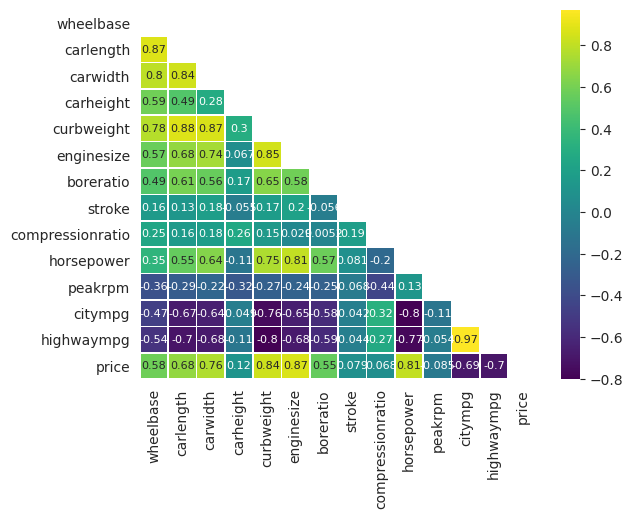

In [18]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

I now want to check what correlation the categorical variables have with price, if any

I'll perform a one way ANOVA test to see if difference in prices occured by chance or not. The null hypothesis is that the variable has no effect on price. If the p-value <0.05 then we'll reject the null hypothesis.

In [19]:
df_categorical = df.select_dtypes(include=['object'])

# Perform one-way ANOVA to test for significant differences in mean price across categories
for col in df_categorical:
    groups = df.groupby(col)['price'].apply(list).tolist()  # Convert to list of lists
    if len(groups) > 1:  # Check if there are multiple groups
        try:
            f_statistic, p_value = f_oneway(*groups)
            print(f"Column: {col}")
            print(f"F-statistic: {f_statistic}")
            print(f"p-value: {p_value}")
            print("--------------------")
        except ValueError:
            print(f"Warning: One-way ANOVA could not be performed for column '{col}'.")
    else:
        print(f"Warning: Insufficient groups for ANOVA in column '{col}'.")

Column: CarName
F-statistic: 8.421907781044004
p-value: 6.414986719214914e-16
--------------------
Column: fueltype
F-statistic: 2.2927407366575174
p-value: 0.13153563336537924
--------------------
Column: aspiration
F-statistic: 6.636621968649918
p-value: 0.010700300833183433
--------------------
Column: doornumber
F-statistic: 0.20594600575940436
p-value: 0.6504483953298938
--------------------
Column: carbody
F-statistic: 8.031976496876302
p-value: 5.031712258477608e-06
--------------------
Column: drivewheel
F-statistic: 70.32055264969262
p-value: 6.632887281209634e-24
--------------------
Column: enginelocation
F-statistic: 23.9697400547047
p-value: 1.993019639057392e-06
--------------------
Column: enginetype
F-statistic: 9.376220306463628
p-value: 4.692664568743044e-09
--------------------
Column: cylindernumber
F-statistic: 57.568880995353695
p-value: 8.065780498463557e-41
--------------------
Column: fuelsystem
F-statistic: 15.64186457466332
p-value: 2.9903859089321575e-16
---

From this result, I will drop all the object variables apart from 'aspiration'. Whilst I know from my background knowledge that some of the other variables can have a significant affect on the price, the data shows otherwise, which means the sample size is too small. This will be taken into consideration when making the conclusions.

In [32]:
# df PreProcessed
df_pp = df[['aspiration','citympg', 'enginesize', 'highwaympg', 'horsepower', 'price']]
df_pp

,aspiration,citympg,enginesize,highwaympg,horsepower,price
0,std,21,130,27,111,13495.0
1,std,21,130,27,111,16500.0
2,std,19,152,26,154,16500.0
3,std,24,109,30,102,13950.0
4,std,18,136,22,115,17450.0
...,...,...,...,...,...,...
200,std,23,141,28,114,16845.0
201,turbo,19,141,25,160,19045.0
202,std,18,173,23,134,21485.0
203,turbo,26,145,27,106,22470.0


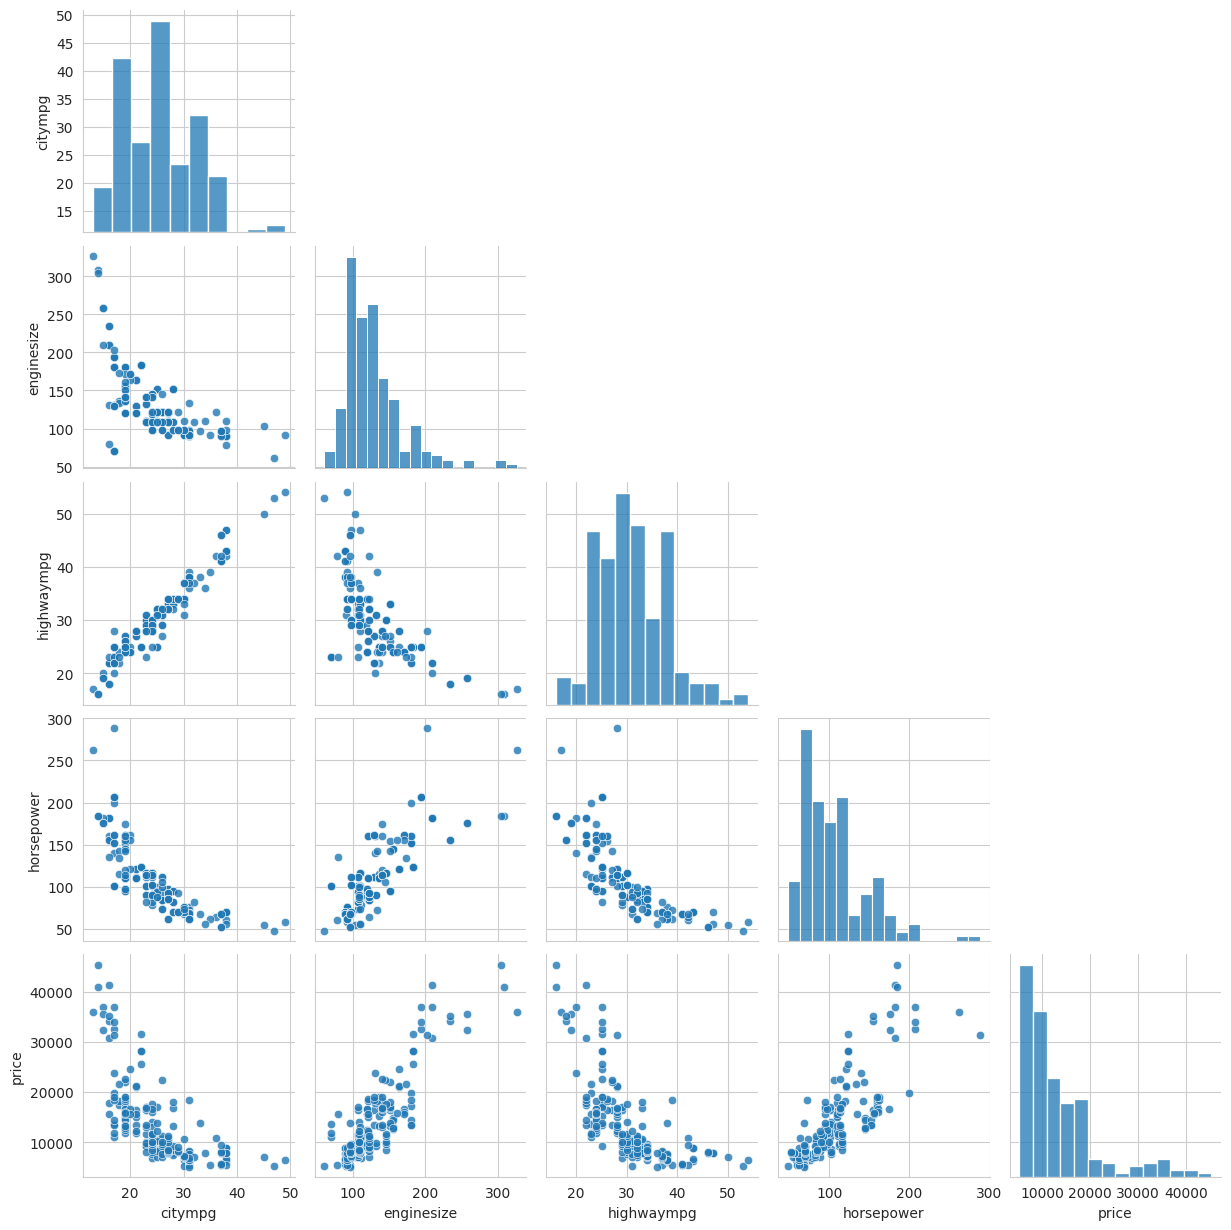

In [33]:
fig = sns.pairplot(data=df_pp.drop(columns=['aspiration']), plot_kws={'alpha':0.8});
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
  fig.axes[i, j].set_visible(False)
plt.show()

We can see looking at the last row, the variables that are left have a strong correlation to price. We'll move forward to checking for outliers for price

I will make a histogram and boxplot to visually observe the distribution and check for outliers in Price

In [25]:
# Filter the DataFrame to keep only rows where the price is greater than 30000
filtered_df = df[df['price'] > 30000]

# Get the count of rows in the filtered DataFrame
count_over_30000 = len(filtered_df)

print(f"Number of rows with price over 30000: {count_over_30000}")

Number of rows with price over 30000: 15


There are quite a few outliers. I will first try and transform and fit my data, and if needed later I will remove these outliers. Just finally before moving onto fitting my data, I will change the aspiration to boolean type using OneHotEncoder

---

# Transforming data

In [26]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

After having removed the features I believed were not important for my analysis, I have a dataframe that I am ready to feed into the transformer. This will produce a dataframe and visualisation charts that will show whether the featureEngineering has improved the data by making it look more like a normal distribution

In [27]:
def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop over each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng, list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing values in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(20, 5))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show();
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=14,y=1)
  plt.show();


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

In [28]:
variables_engineering = ['citympg', 'enginesize', 'highwaympg', 'horsepower', 'price']
df_engineering = df[variables_engineering].copy()
df_engineering.head(3)

,citympg,enginesize,highwaympg,horsepower,price
0,21,130,27,111,13495.0
1,21,130,27,111,16500.0
2,19,152,26,154,16500.0


* Variable Analyzed: citympg
* Applied transformation: ['citympg_log_e', 'citympg_log_10', 'citympg_reciprocal', 'citympg_power', 'citympg_box_cox', 'citympg_yeo_johnson'] 



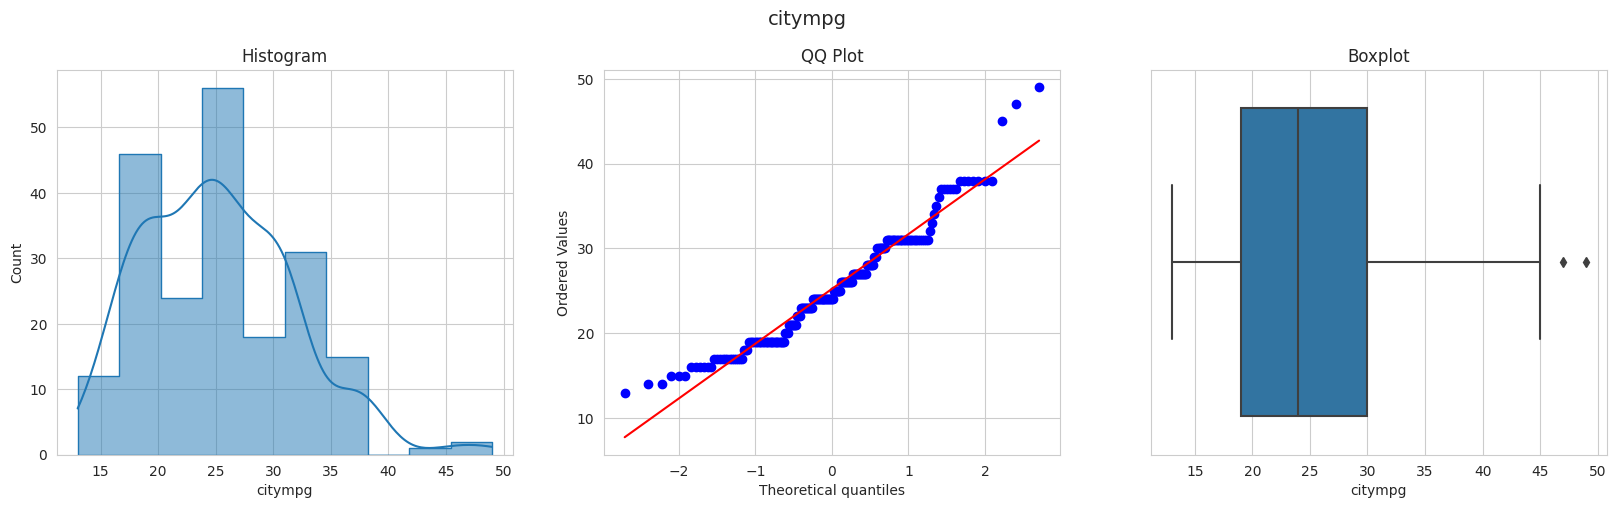

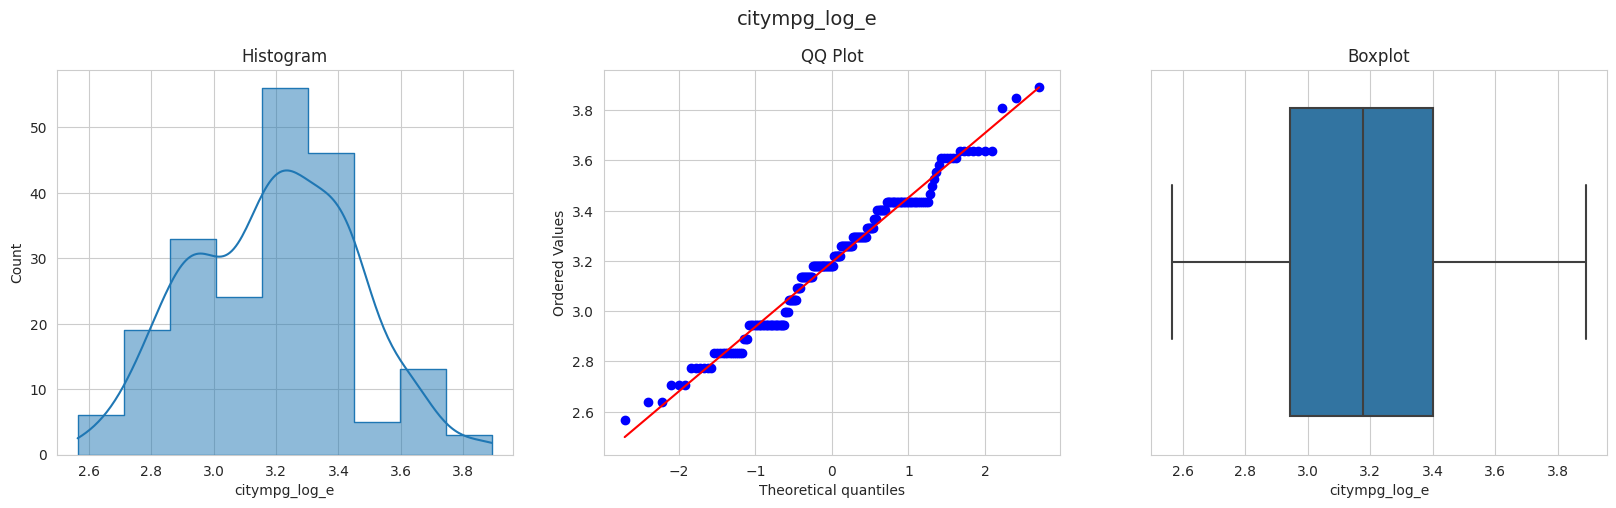

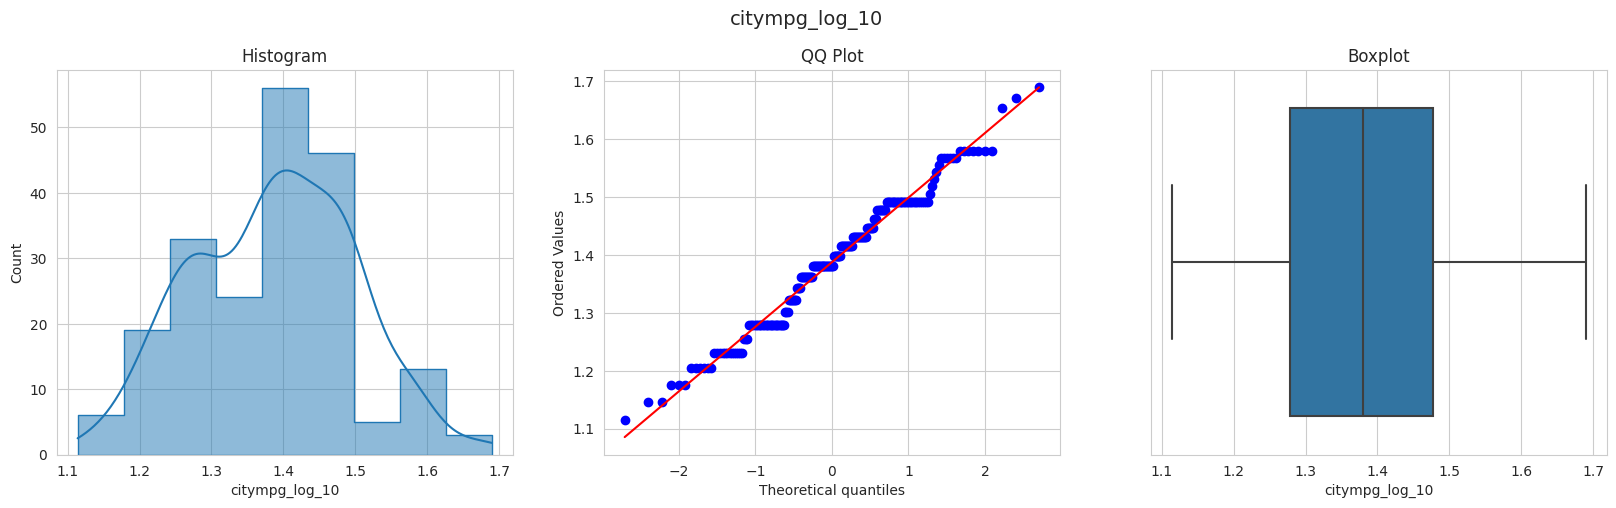

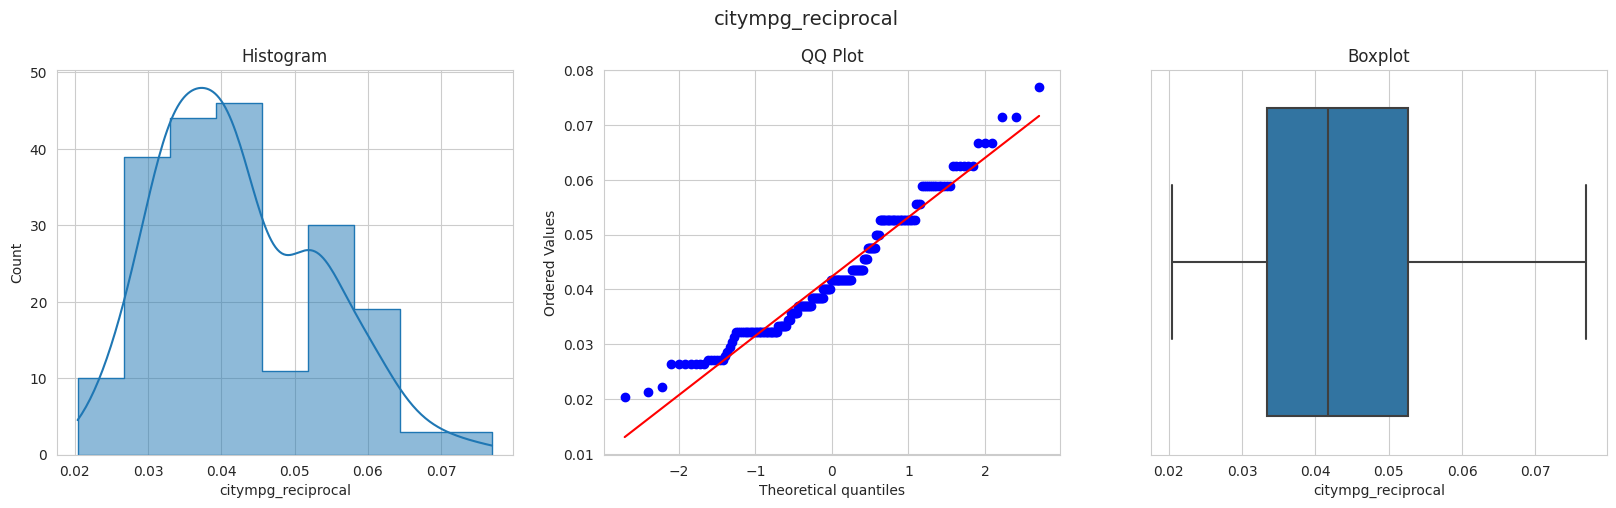

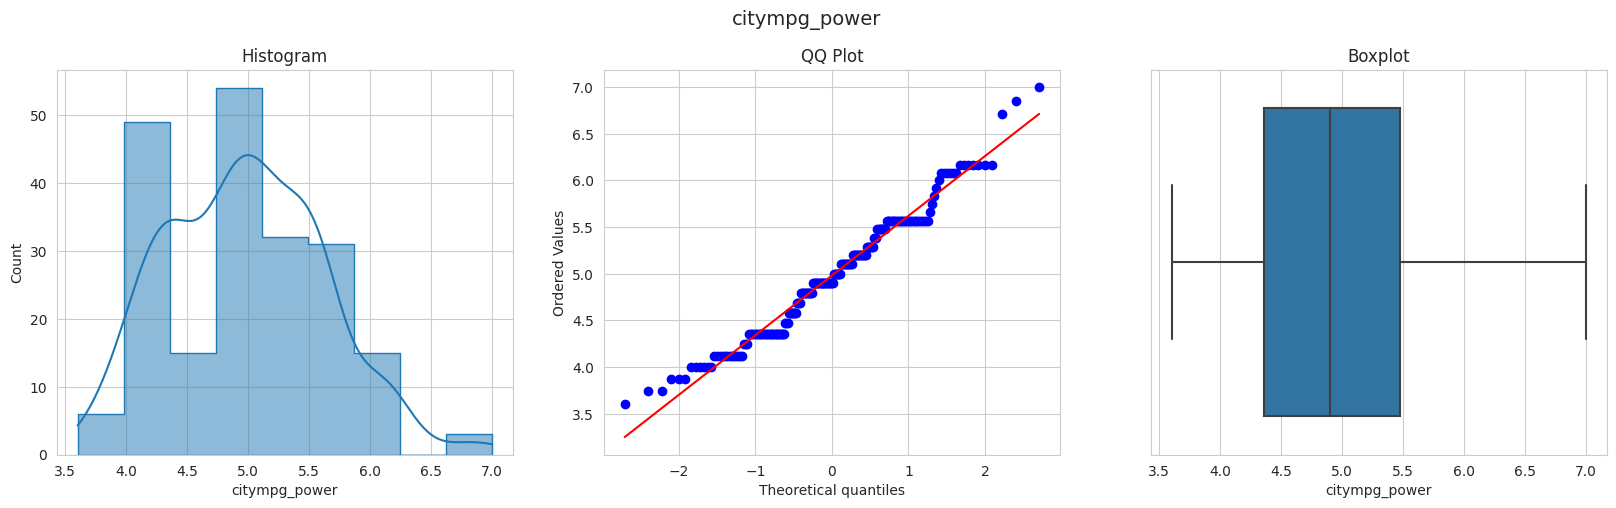

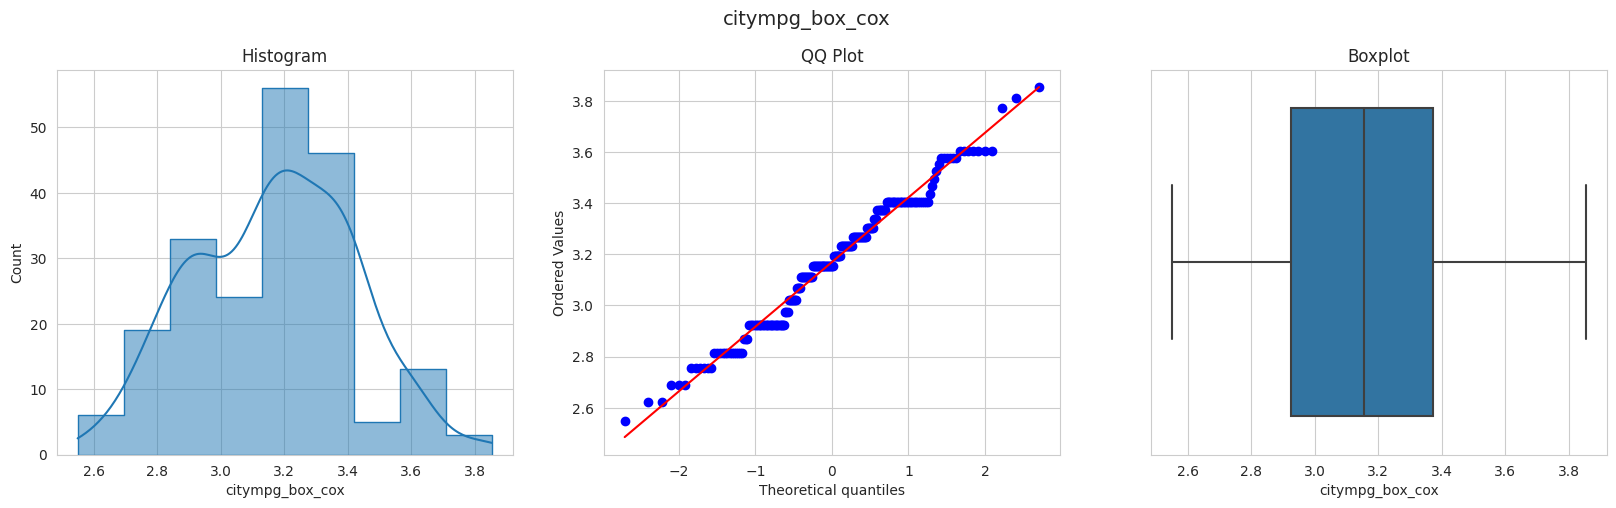

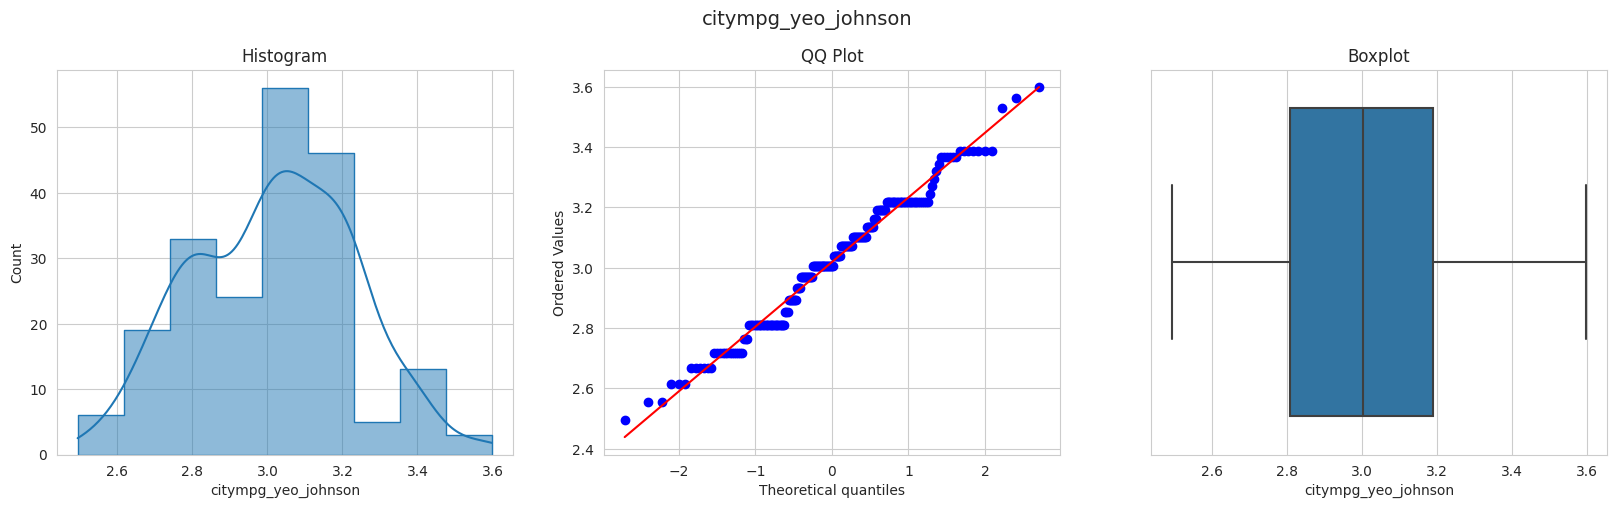



* Variable Analyzed: enginesize
* Applied transformation: ['enginesize_log_e', 'enginesize_log_10', 'enginesize_reciprocal', 'enginesize_power', 'enginesize_box_cox', 'enginesize_yeo_johnson'] 



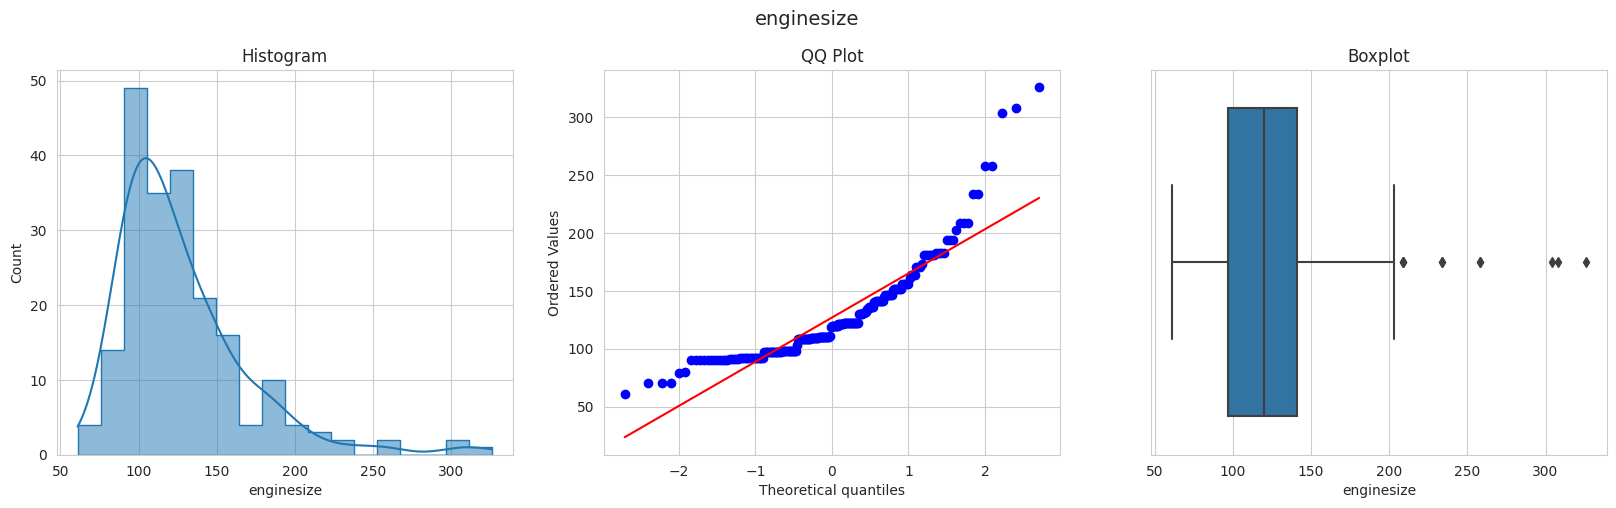

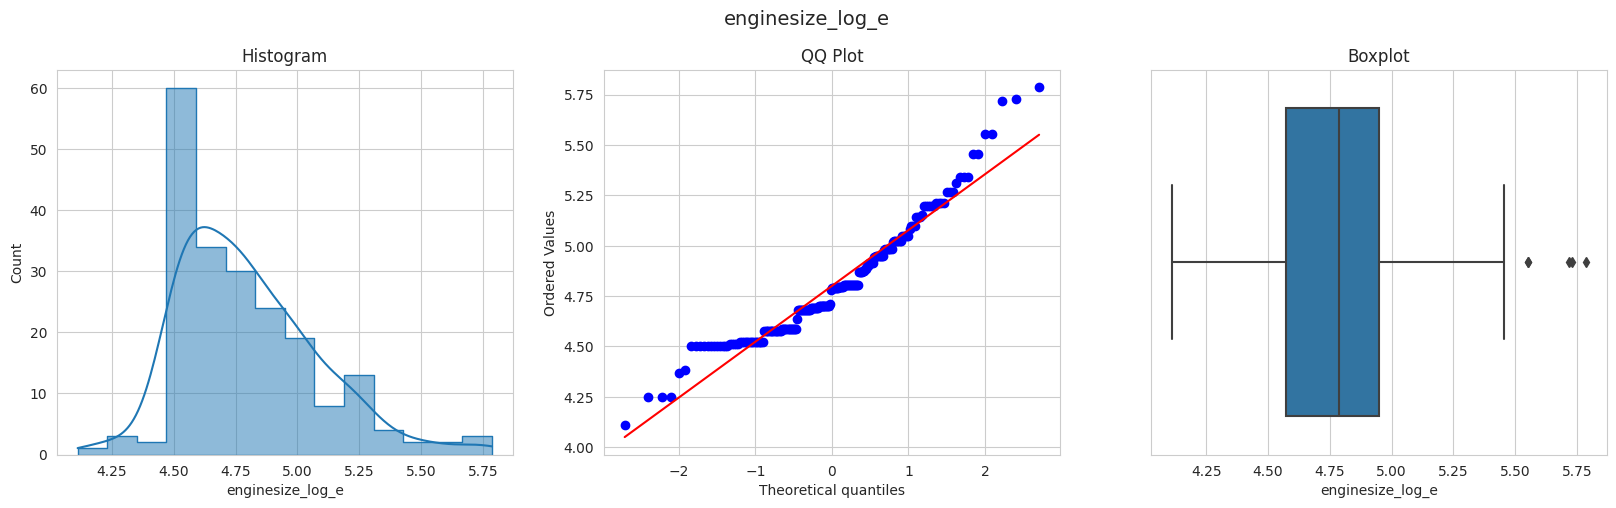

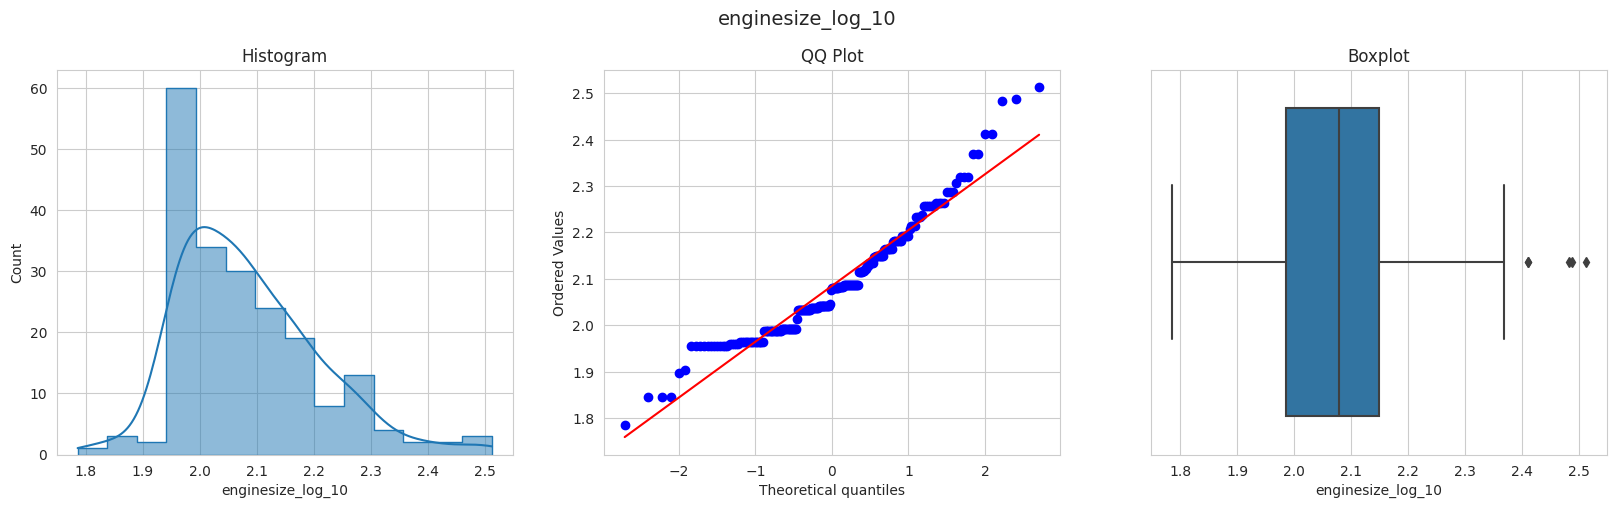

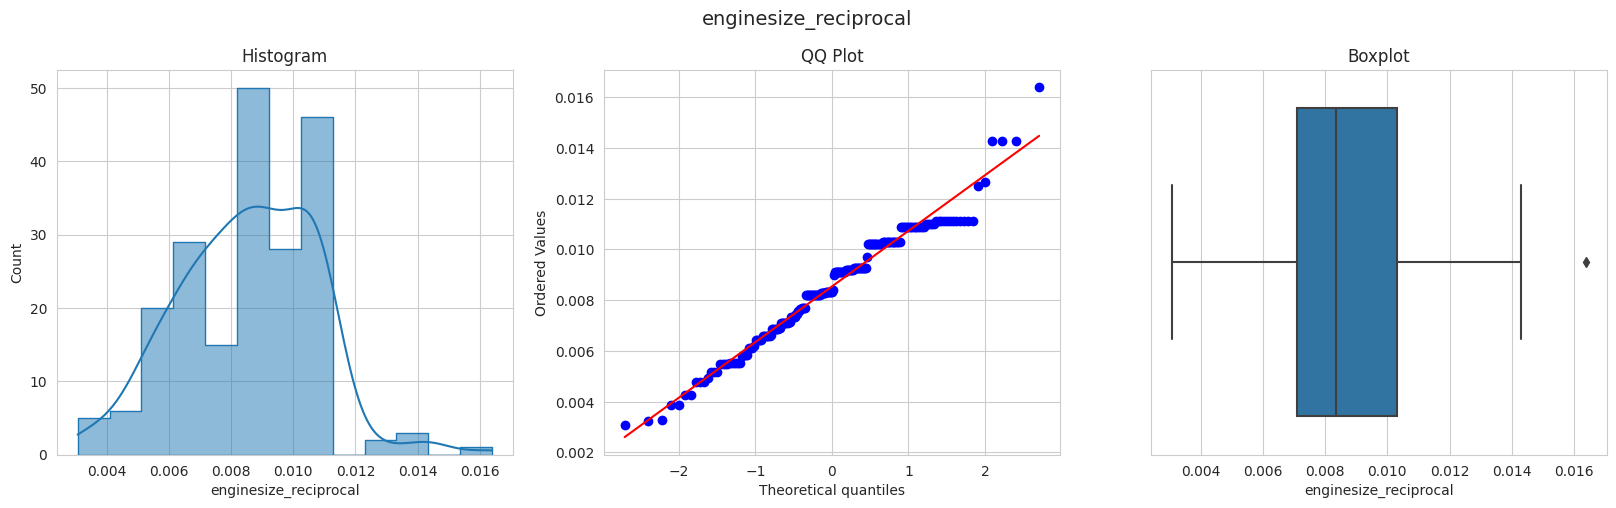

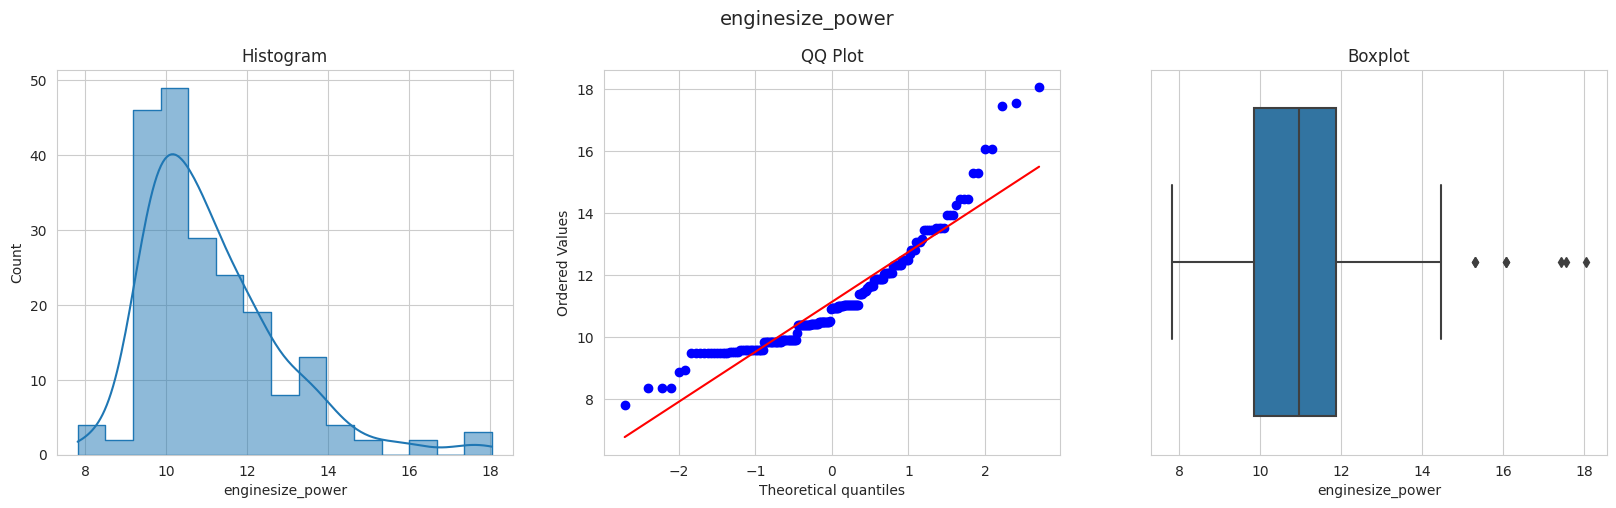

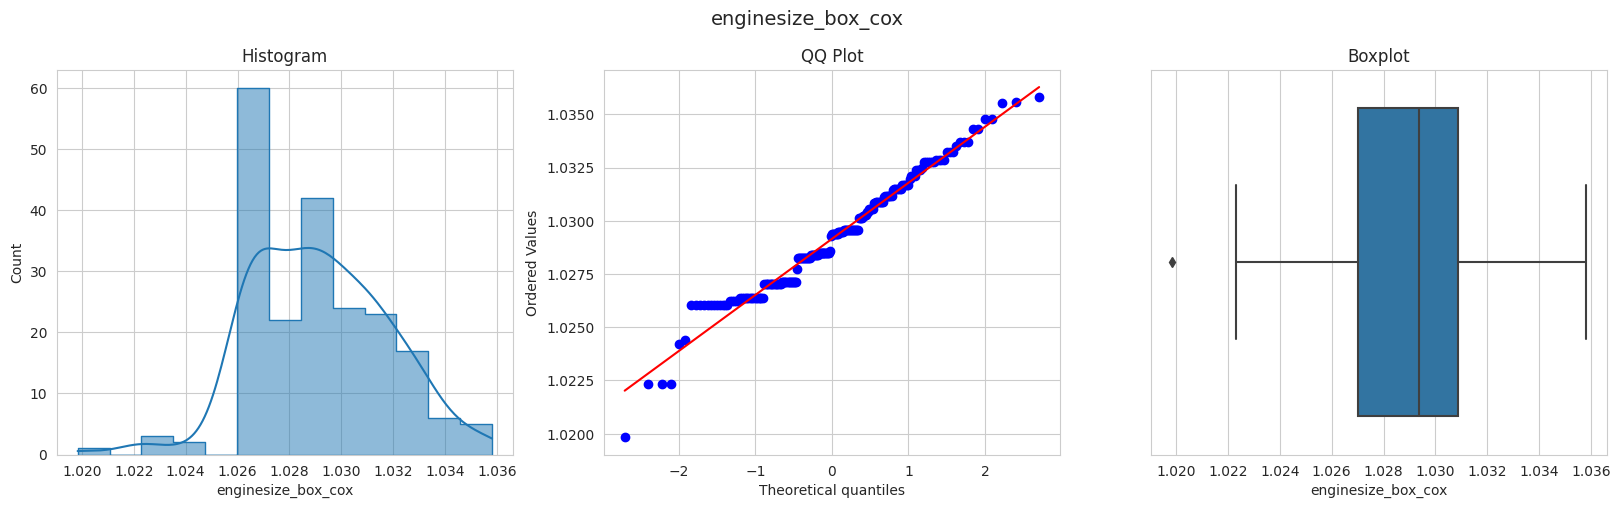

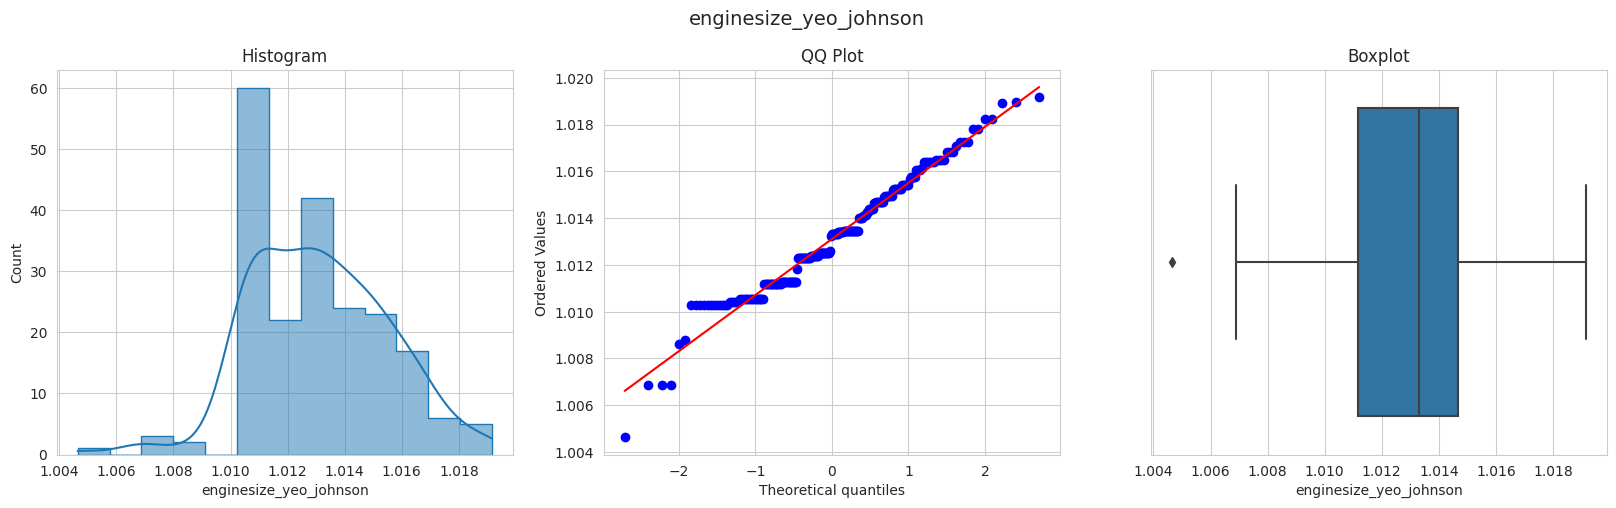



* Variable Analyzed: highwaympg
* Applied transformation: ['highwaympg_log_e', 'highwaympg_log_10', 'highwaympg_reciprocal', 'highwaympg_power', 'highwaympg_box_cox', 'highwaympg_yeo_johnson'] 



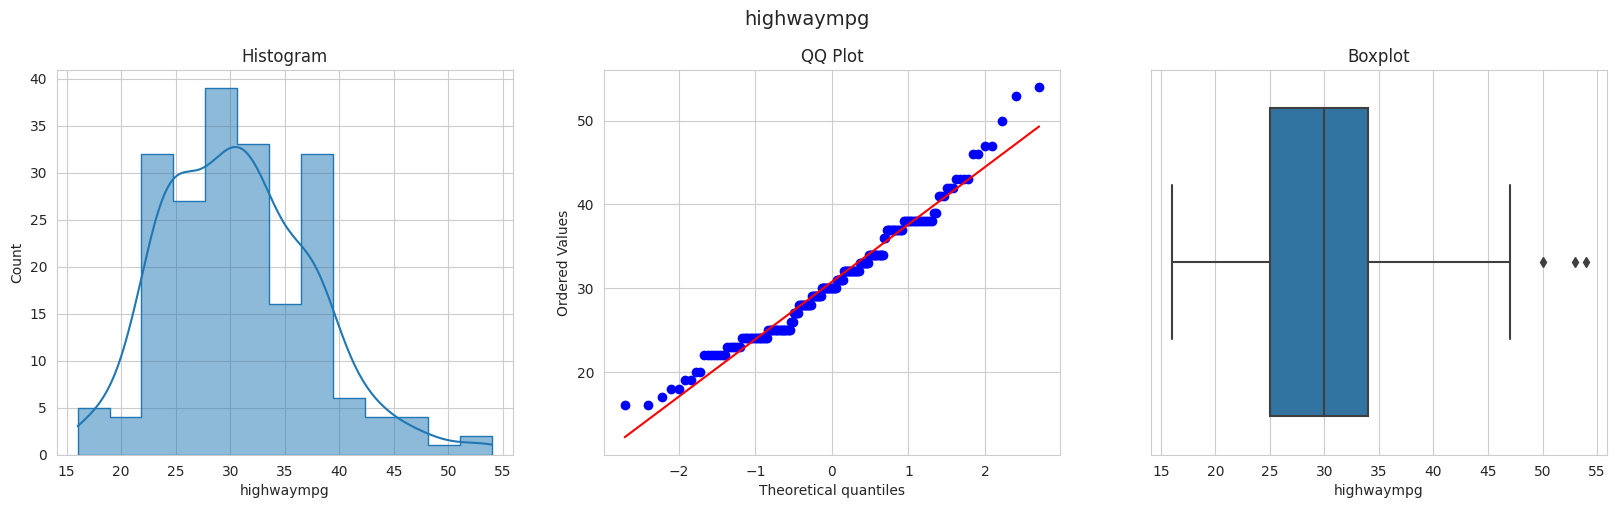

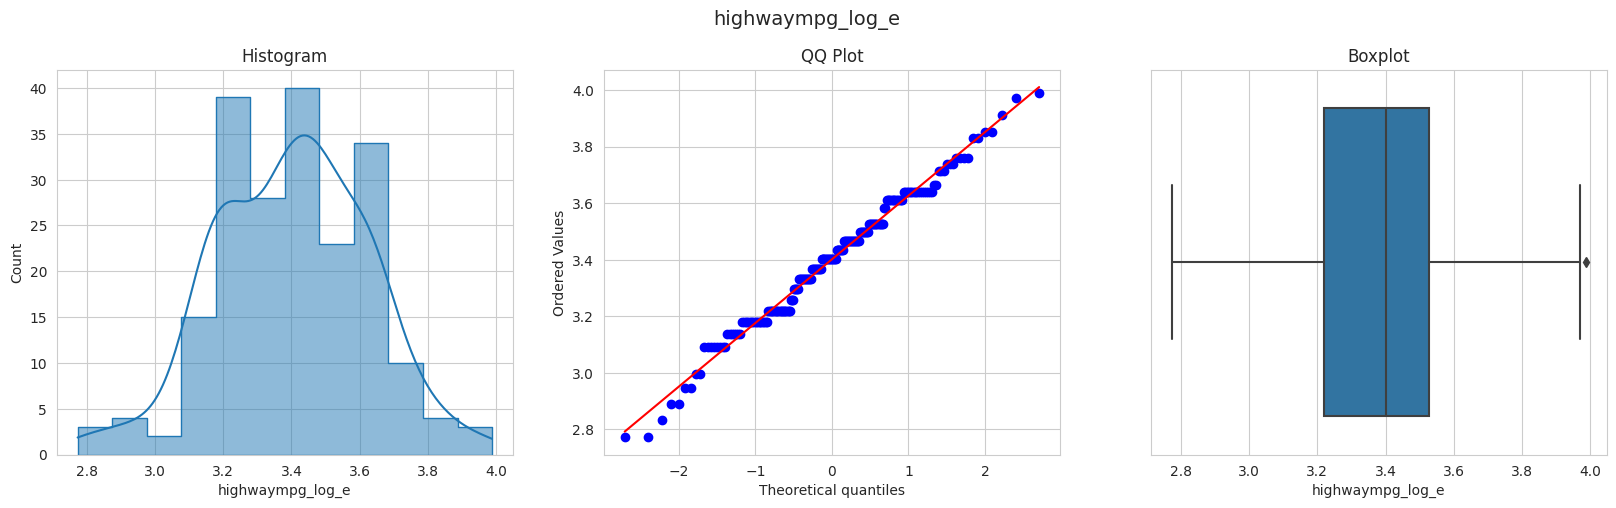

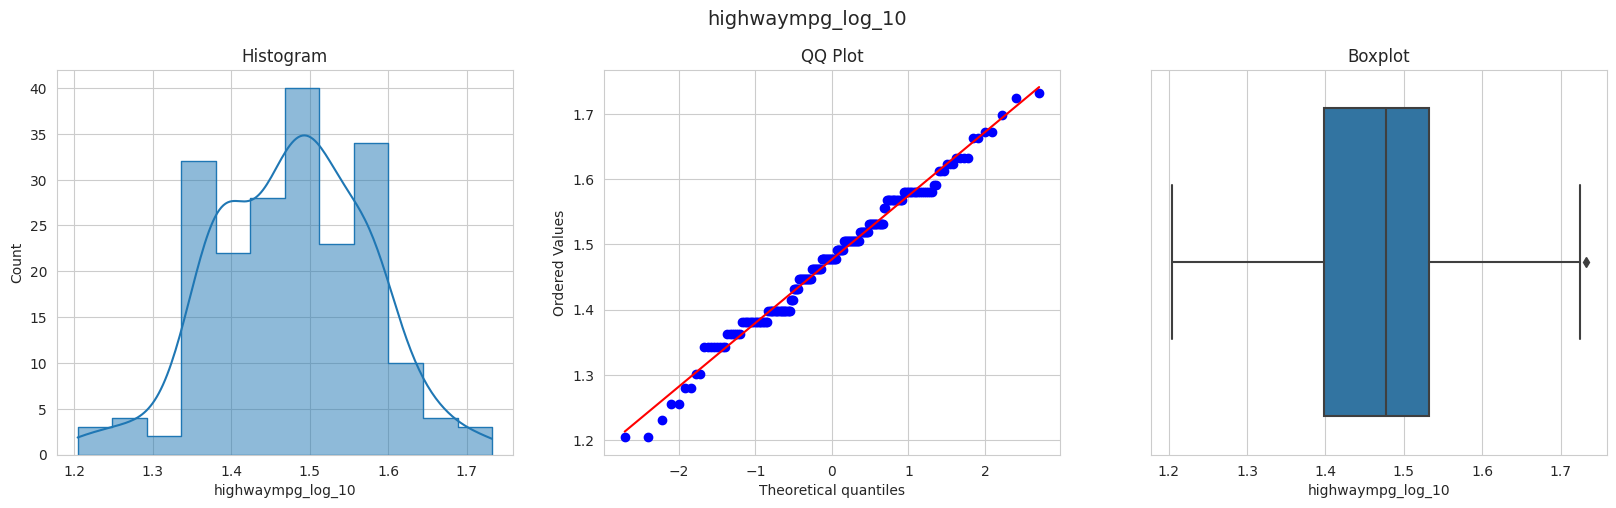

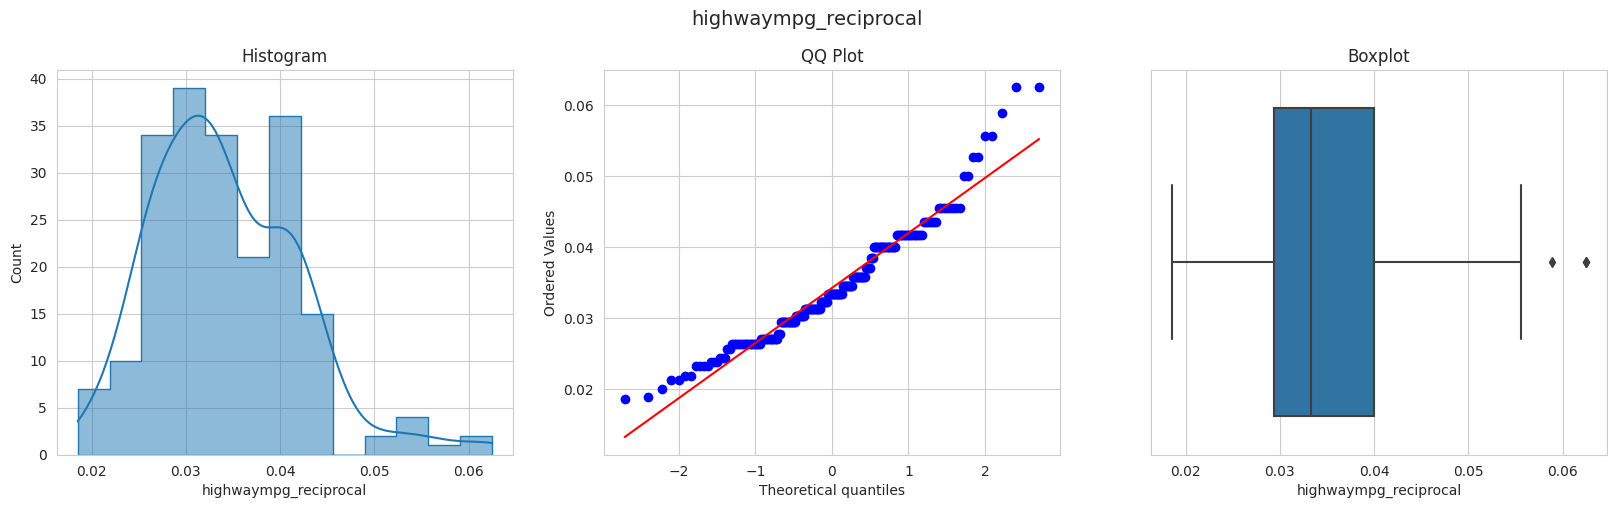

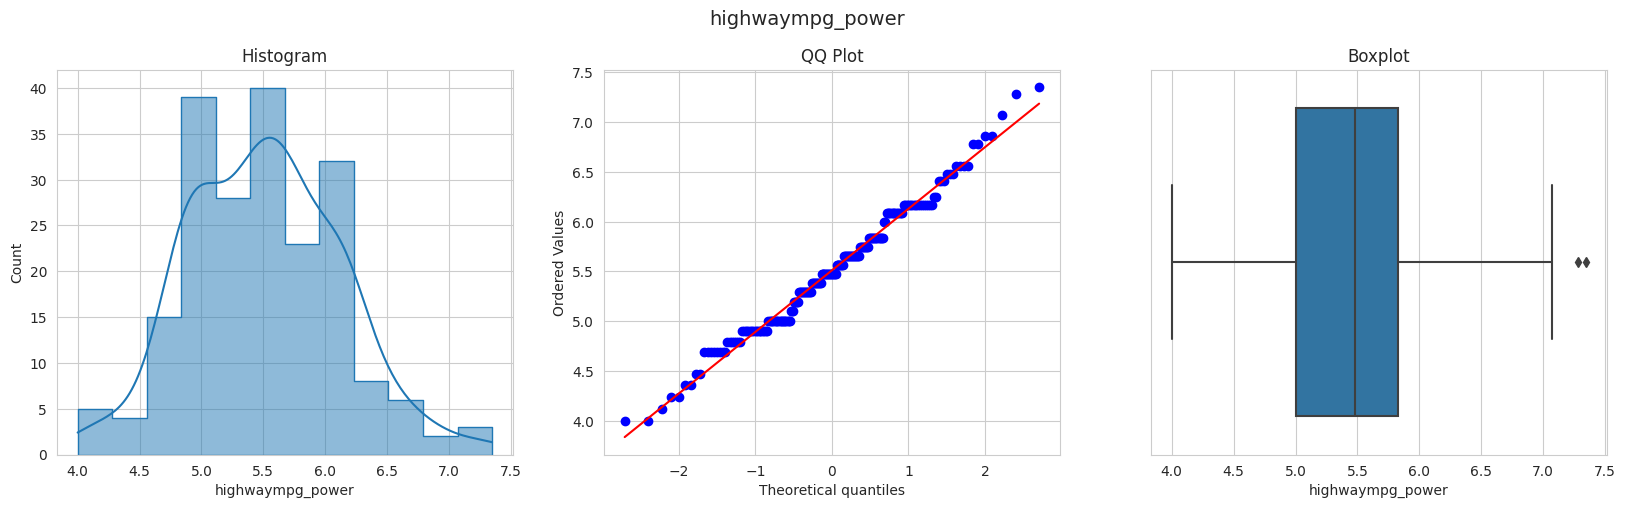

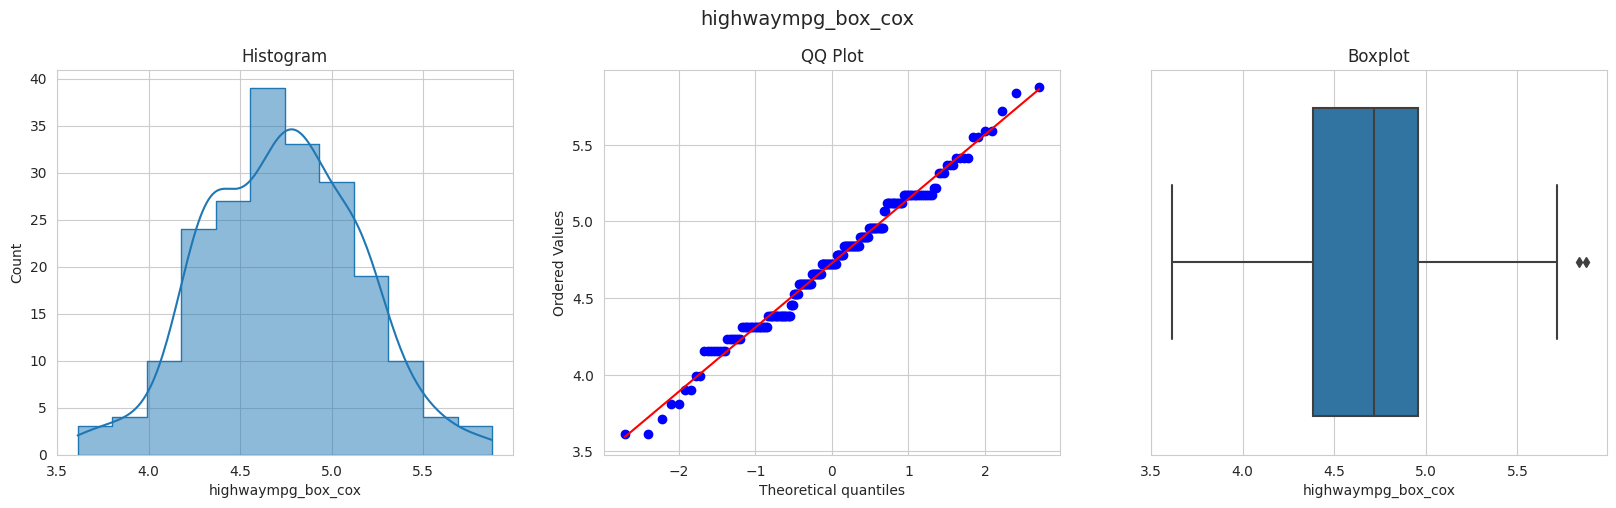

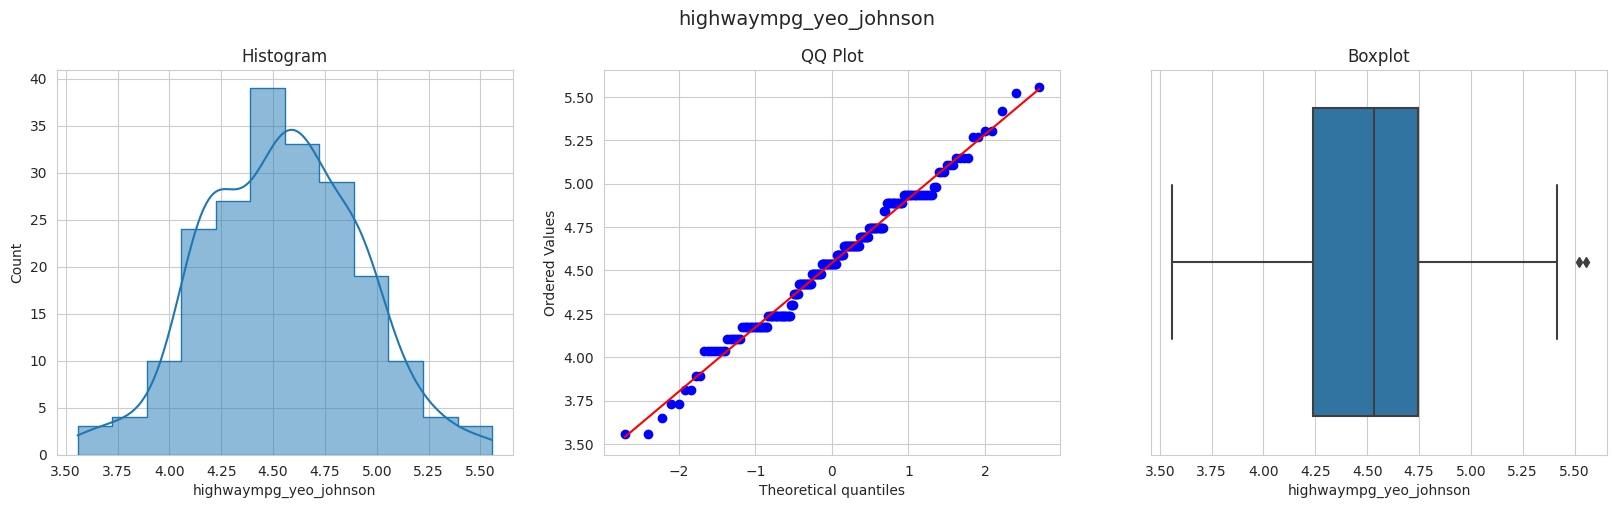



* Variable Analyzed: horsepower
* Applied transformation: ['horsepower_log_e', 'horsepower_log_10', 'horsepower_reciprocal', 'horsepower_power', 'horsepower_box_cox', 'horsepower_yeo_johnson'] 



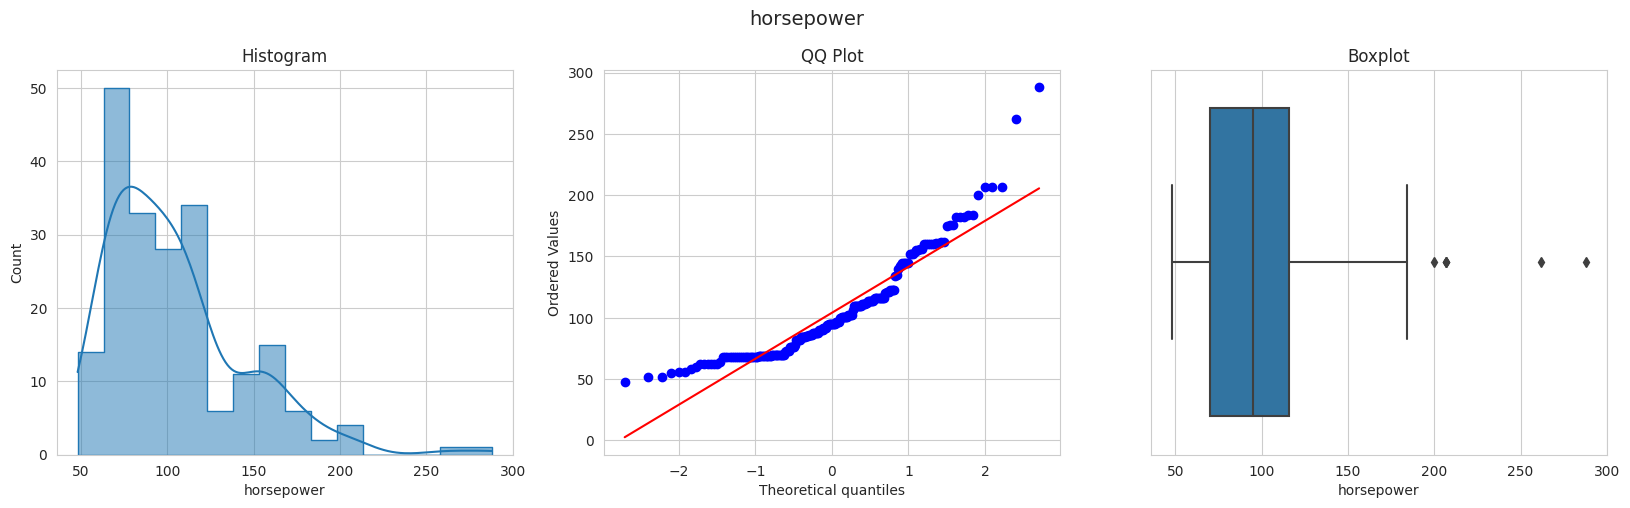

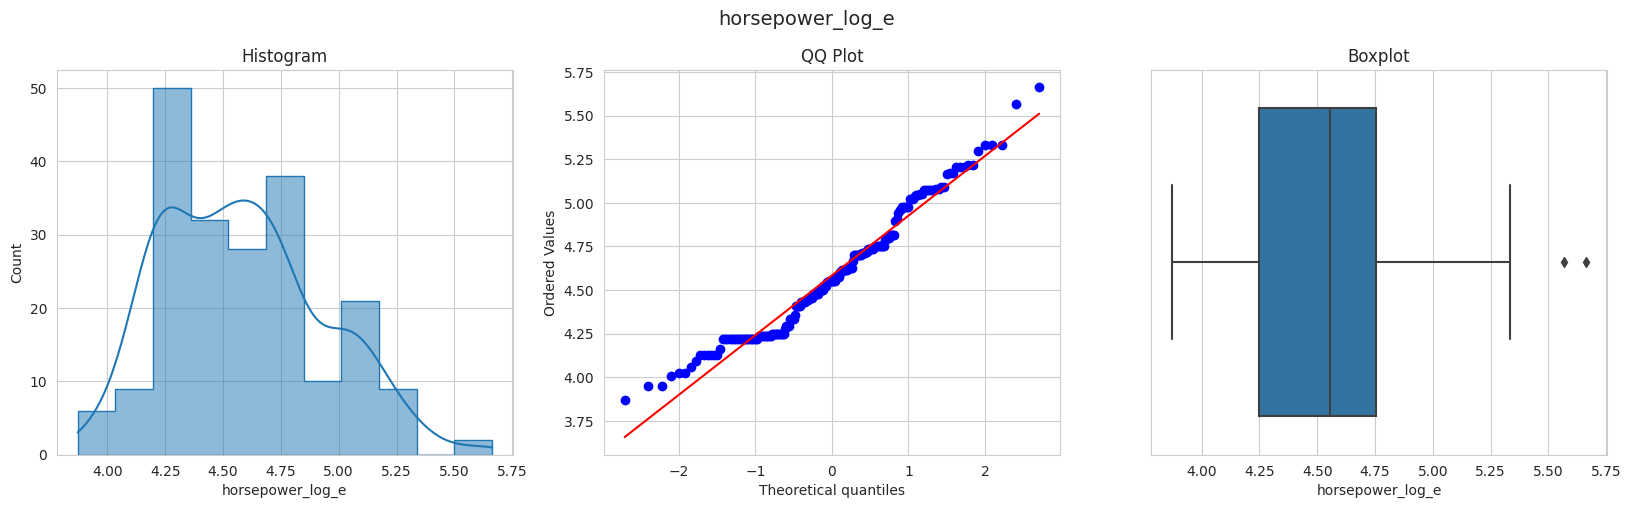

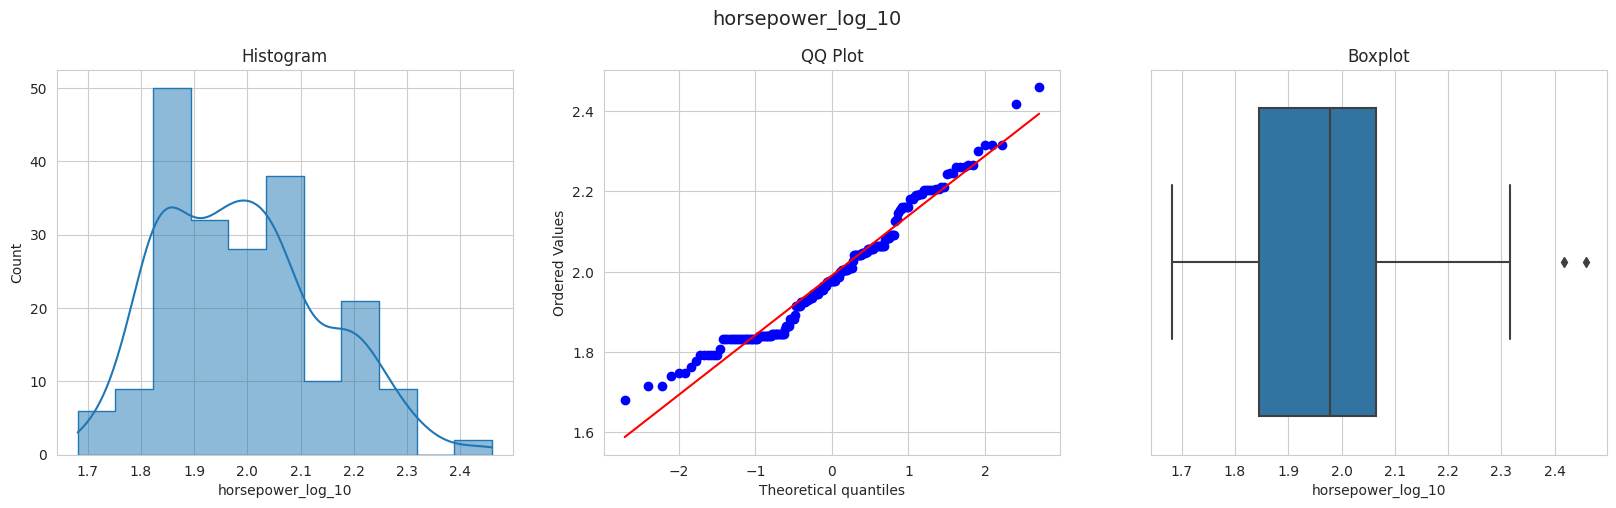

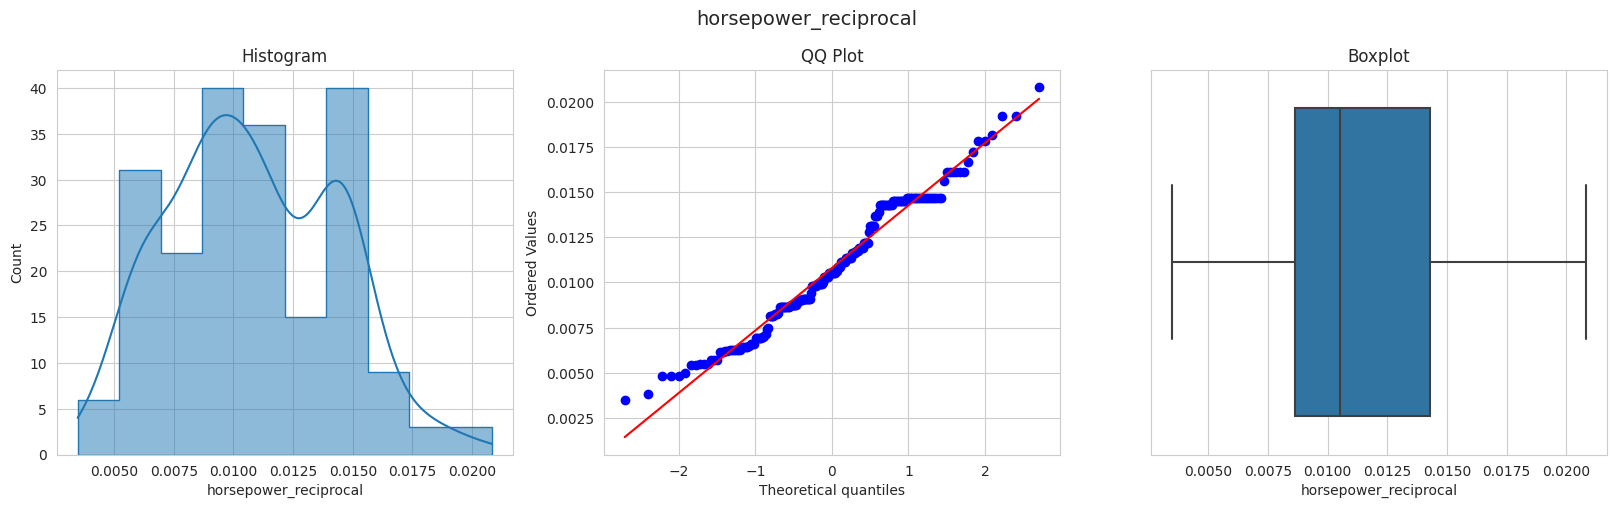

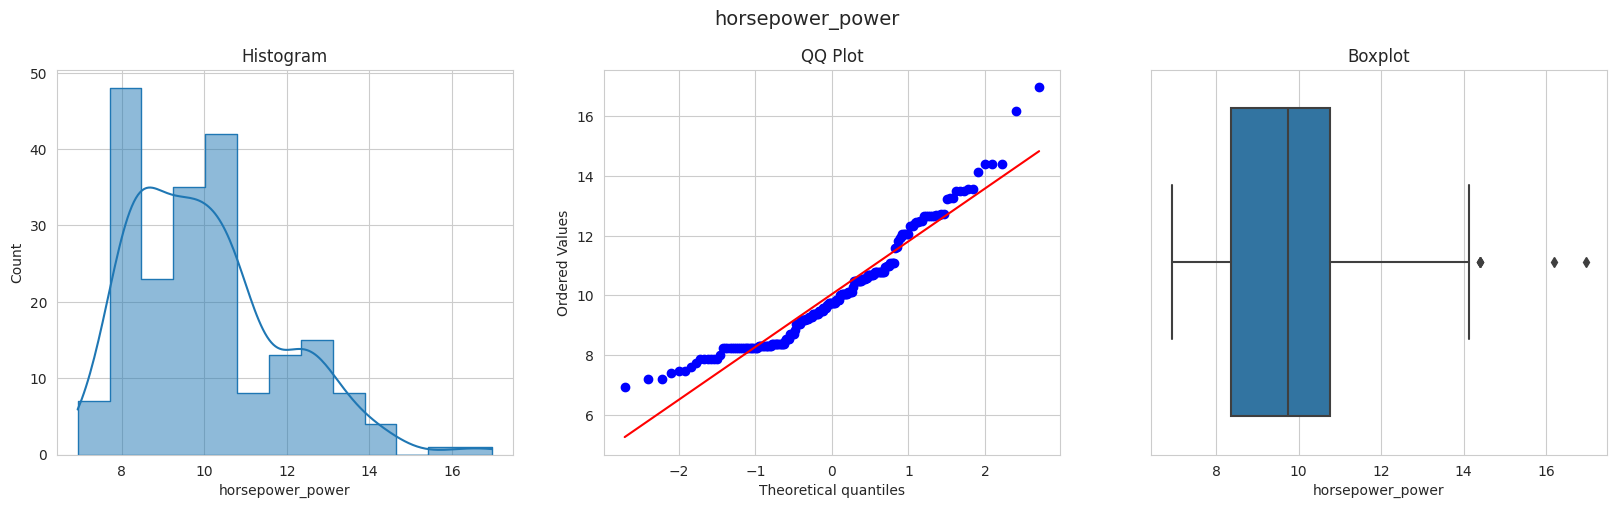

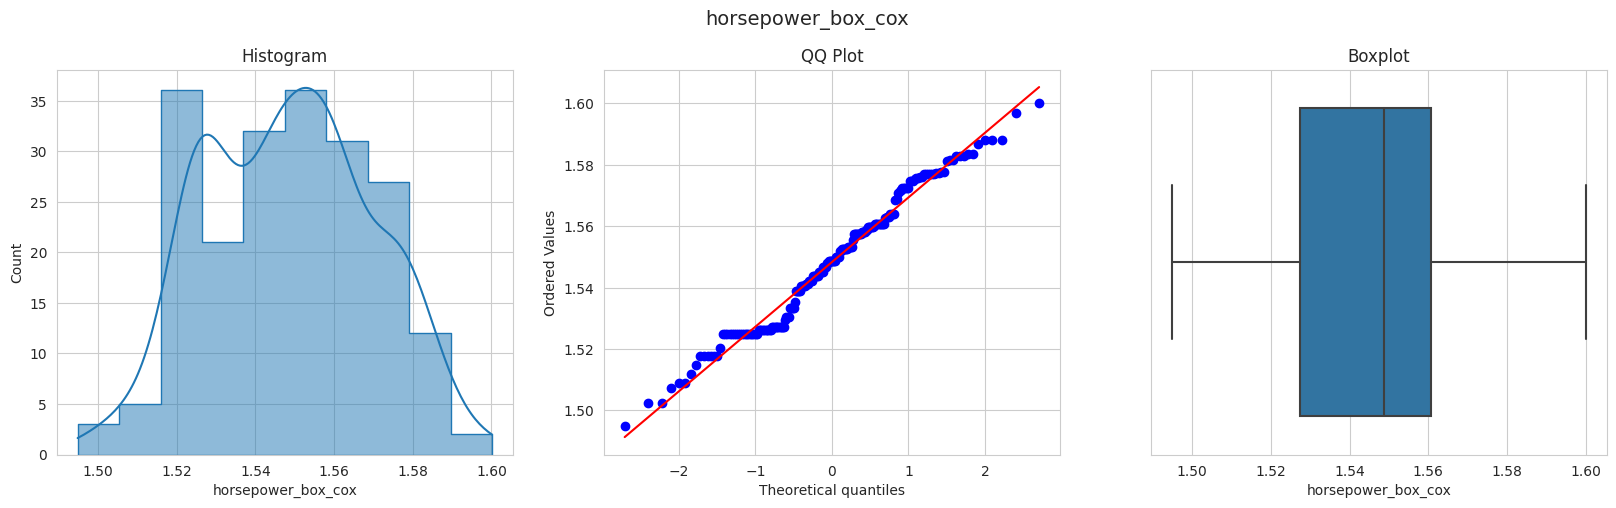

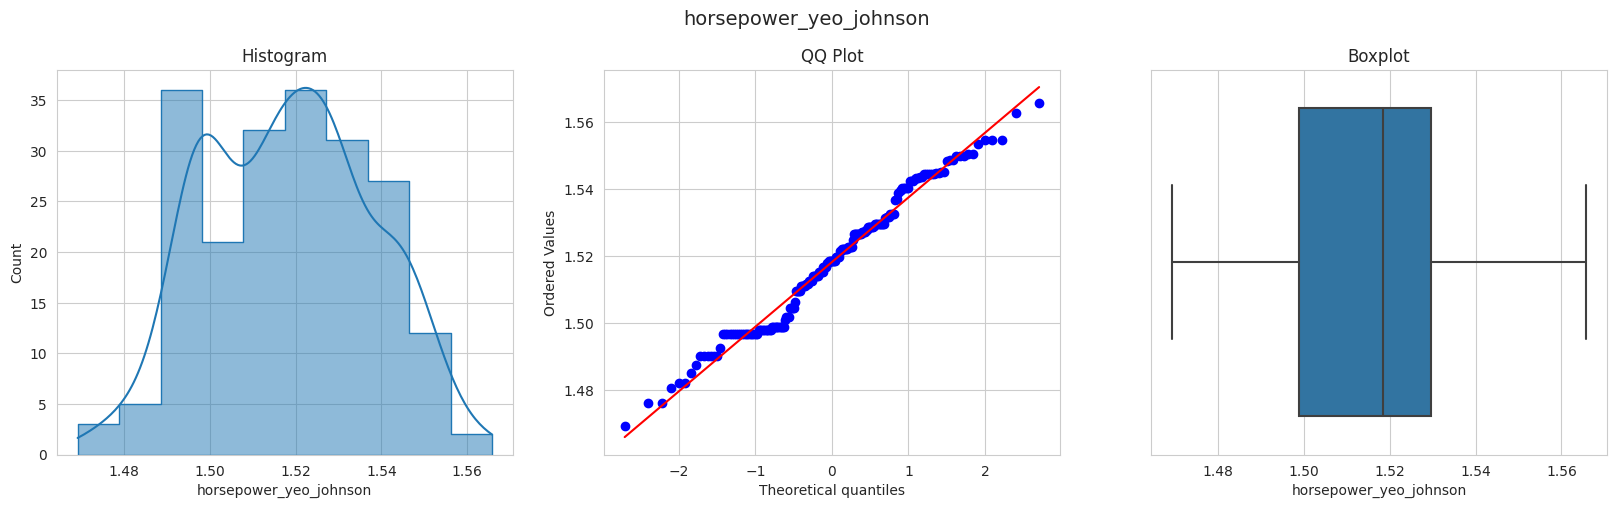



* Variable Analyzed: price
* Applied transformation: ['price_log_e', 'price_log_10', 'price_reciprocal', 'price_power', 'price_box_cox', 'price_yeo_johnson'] 



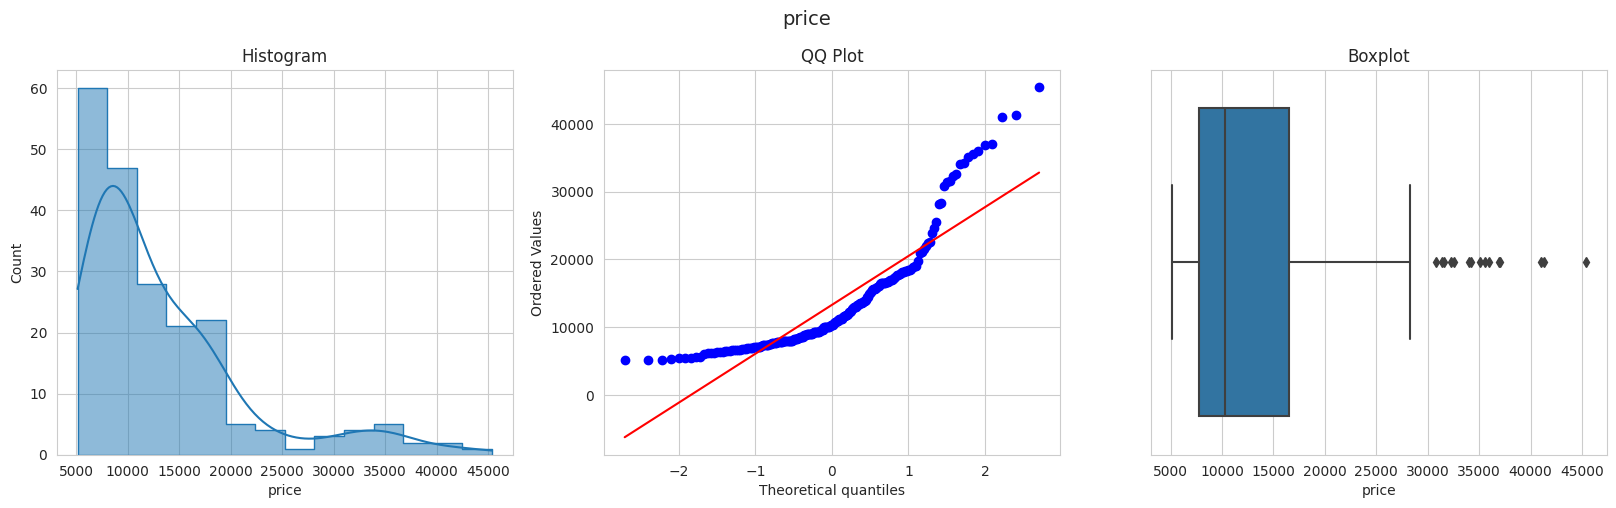

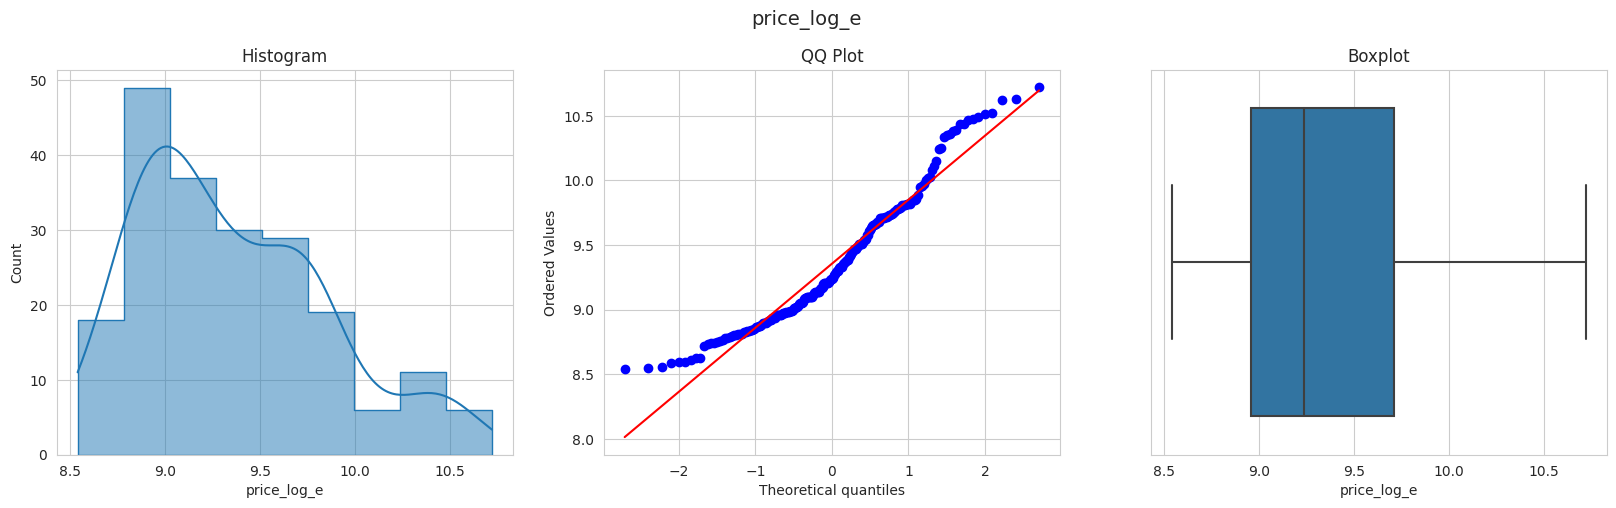

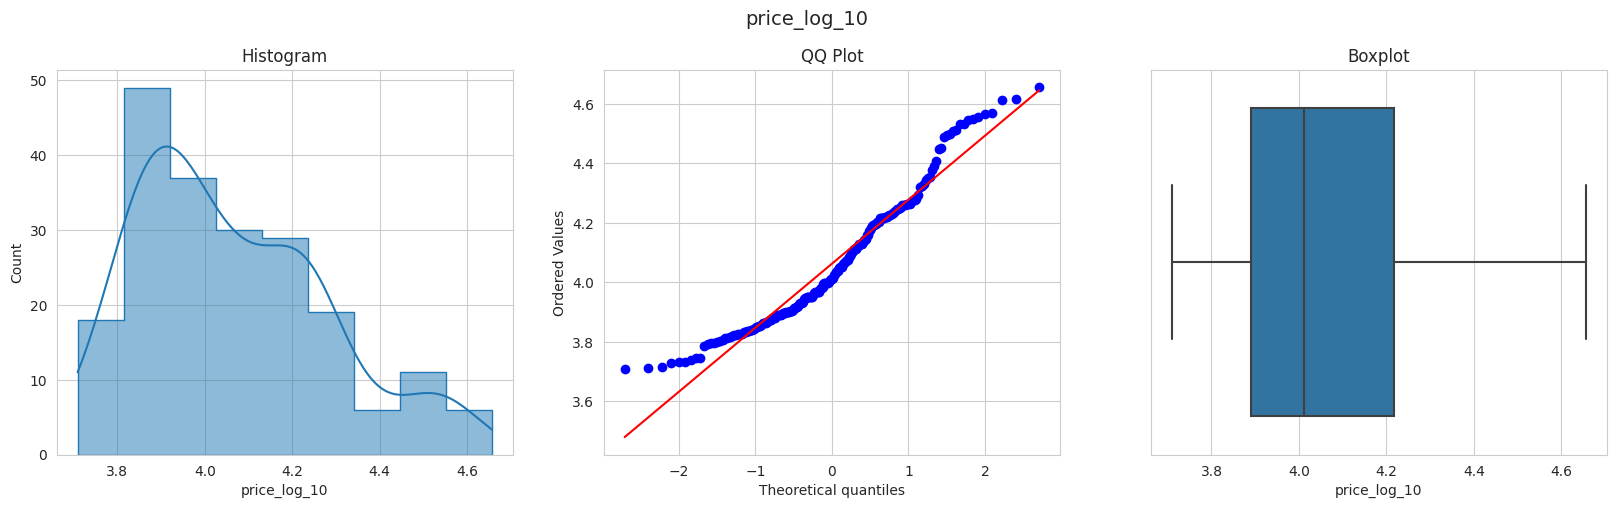

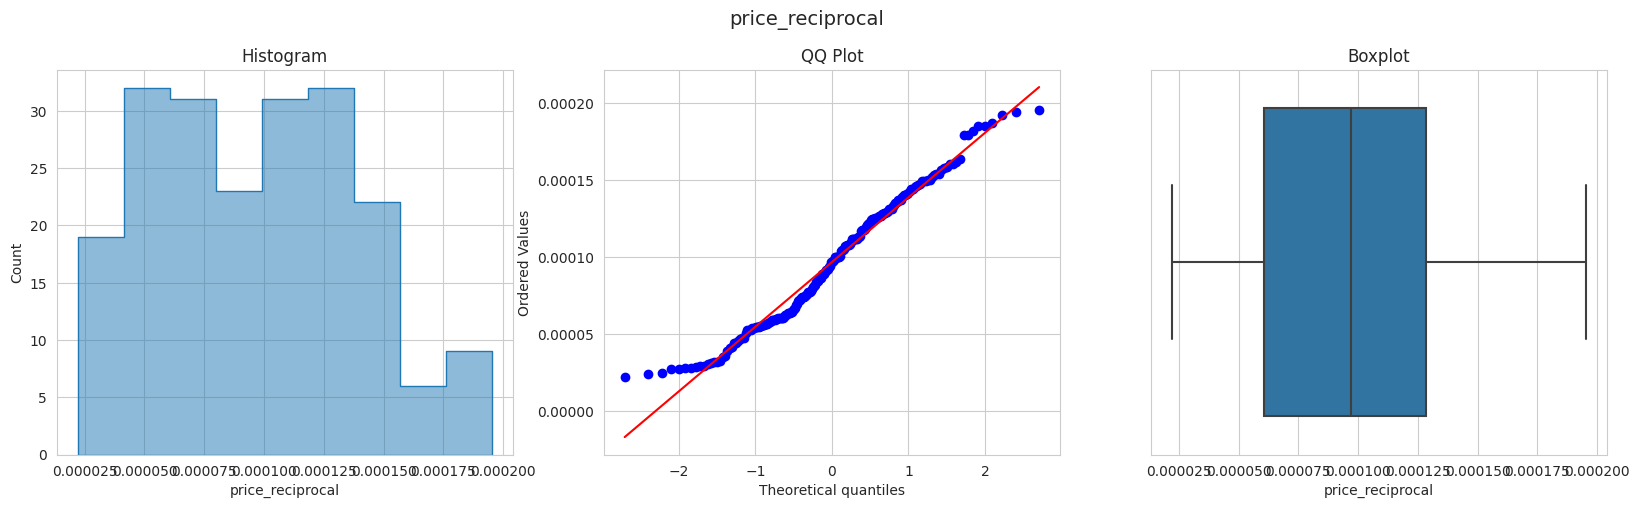

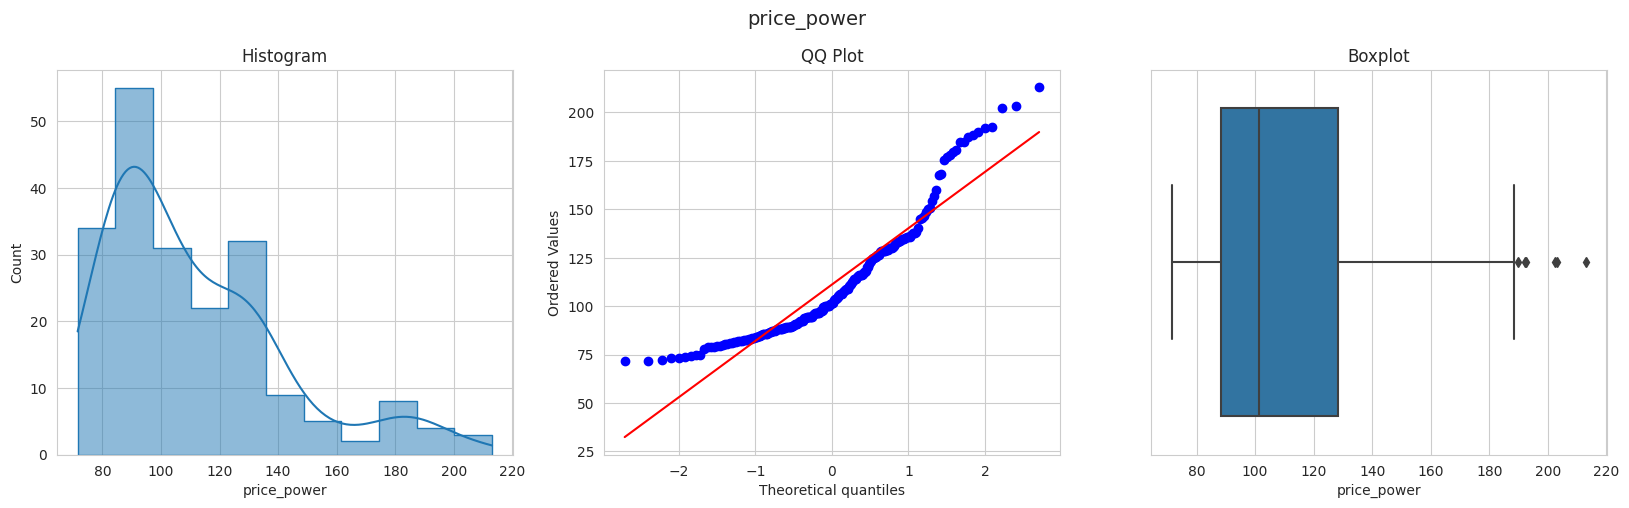

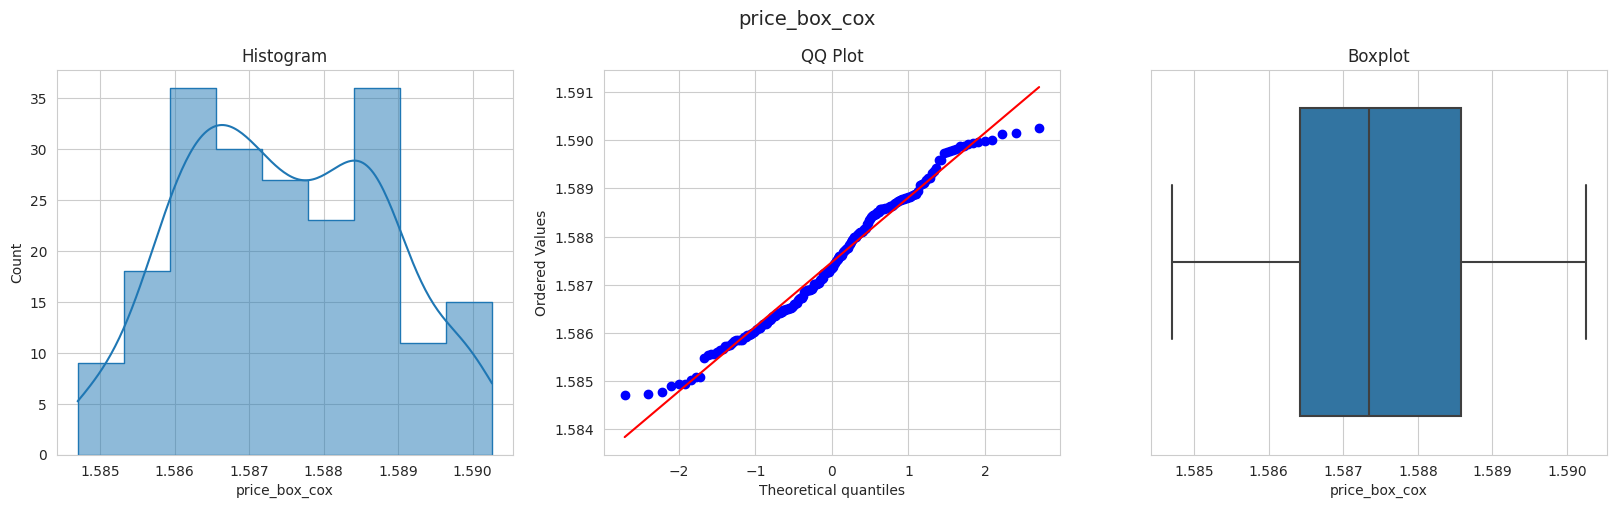

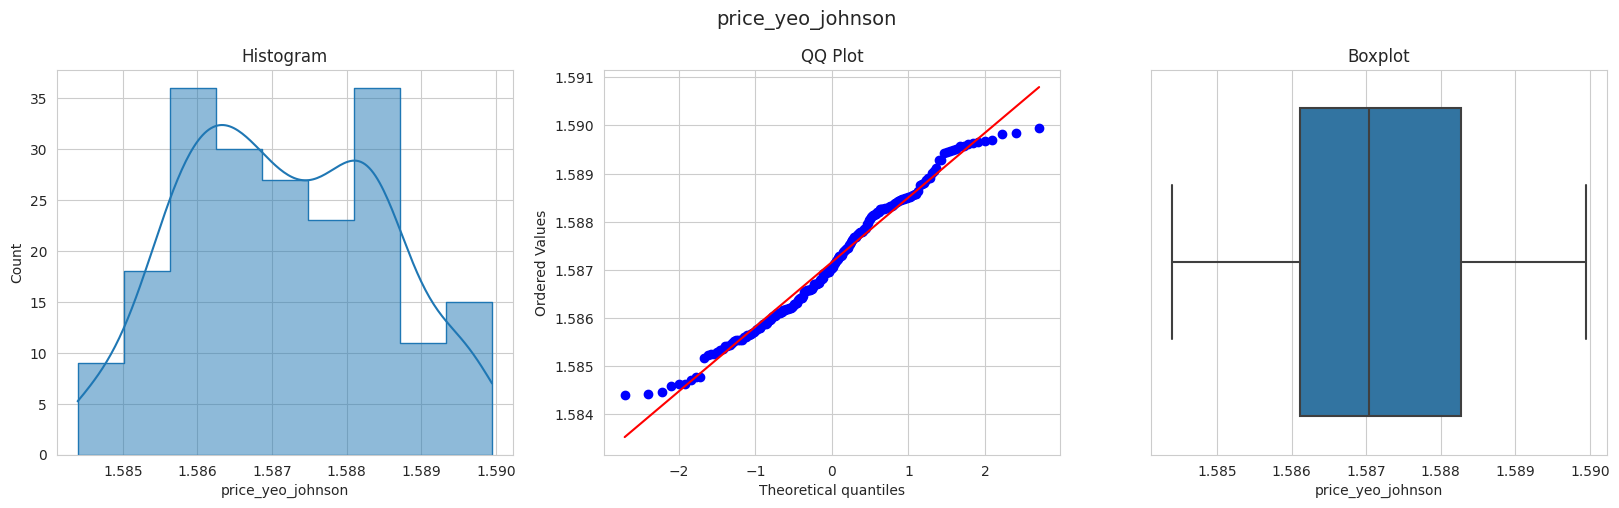

In [29]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering,analysis_type='numerical')

Looking at the outputs we can see:

* 'citympg' - Distribution is improved (closer to normal distribution) scaling with both logs and Yeo Johnson. There are no outliers
* 'enginesize' - Distribution is improved with Reciprocal, box cox and Yeo Johnson. only 1 outlier
* 'highwaympg' - Distribution is improved with both logs. we have 1 outlier. With Yeo Johnson distribution is also improved but has 2 outliers
* 'horsepower' - Distribution is improved with reciprocal, Box Cox and Yeo Johnson. No Outliers
* 'price' - Distribution is significantly improved with Box Cox and Yeo Johnson. No outliers

In [30]:
df_engineering

,citympg,citympg_log_e,citympg_log_10,citympg_reciprocal,citympg_power,citympg_box_cox,citympg_yeo_johnson,enginesize,enginesize_log_e,enginesize_log_10,...,horsepower_power,horsepower_box_cox,horsepower_yeo_johnson,price,price_log_e,price_log_10,price_reciprocal,price_power,price_box_cox,price_yeo_johnson
0,21,3.044522,1.322219,0.047619,4.582576,3.022116,2.893289,130,4.867534,2.113943,...,10.535654,1.558115,1.527232,13495.0,9.510075,4.130173,0.000074,116.167982,1.588097,1.587790
1,21,3.044522,1.322219,0.047619,4.582576,3.022116,2.893289,130,4.867534,2.113943,...,10.535654,1.558115,1.527232,16500.0,9.711116,4.217484,0.000061,128.452326,1.588578,1.588270
2,19,2.944439,1.278754,0.052632,4.358899,2.923478,2.809736,152,5.023881,2.181844,...,12.409674,1.575345,1.543050,16500.0,9.711116,4.217484,0.000061,128.452326,1.588578,1.588270
3,24,3.178054,1.380211,0.041667,4.898979,3.153644,3.004814,109,4.691348,2.037426,...,10.099505,1.553083,1.522611,13950.0,9.543235,4.144574,0.000072,118.110118,1.588181,1.587873
4,18,2.890372,1.255273,0.055556,4.242641,2.870172,2.764628,136,4.912655,2.133539,...,10.723805,1.560147,1.529098,17450.0,9.767095,4.241795,0.000057,132.098448,1.588702,1.588393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,23,3.135494,1.361728,0.043478,4.795832,3.111732,2.969267,141,4.948760,2.149219,...,10.677078,1.559650,1.528641,16845.0,9.731809,4.226471,0.000059,129.788289,1.588624,1.588316
201,19,2.944439,1.278754,0.052632,4.358899,2.923478,2.809736,141,4.948760,2.149219,...,12.649111,1.577143,1.544699,19045.0,9.854560,4.279781,0.000053,138.003623,1.588886,1.588578
202,18,2.890372,1.255273,0.055556,4.242641,2.870172,2.764628,173,5.153292,2.238046,...,11.575837,1.568439,1.536711,21485.0,9.975110,4.332135,0.000047,146.577624,1.589124,1.588815
203,26,3.258097,1.414973,0.038462,5.099020,3.232445,3.071659,145,4.976734,2.161368,...,10.295630,1.555404,1.524743,22470.0,10.019936,4.351603,0.000045,149.899967,1.589208,1.588899


I will be scaling my variables with Yeo Johnson as that produced the best results, i.e. closer to a normal distribution and no/minimal outliers. Next I will make the variables to visualise the data before and after transformation

In [41]:
# pre processing and post processing data
df_prep = df_pp
df_postp = pd.concat([df_pp['aspiration'], 
                      df_engineering[['citympg_yeo_johnson', 
                                     'enginesize_yeo_johnson', 
                                     'highwaympg_yeo_johnson', 
                                     'horsepower_yeo_johnson', 
                                     'price_yeo_johnson']]], 
                     axis=1)

In [42]:
df_prep

,aspiration,citympg,enginesize,highwaympg,horsepower,price
0,std,21,130,27,111,13495.0
1,std,21,130,27,111,16500.0
2,std,19,152,26,154,16500.0
3,std,24,109,30,102,13950.0
4,std,18,136,22,115,17450.0
...,...,...,...,...,...,...
200,std,23,141,28,114,16845.0
201,turbo,19,141,25,160,19045.0
202,std,18,173,23,134,21485.0
203,turbo,26,145,27,106,22470.0


In [43]:
df_postp

,aspiration,citympg_yeo_johnson,enginesize_yeo_johnson,highwaympg_yeo_johnson,horsepower_yeo_johnson,price_yeo_johnson
0,std,2.893289,1.014021,4.362712,1.527232,1.587790
1,std,2.893289,1.014021,4.362712,1.527232,1.588270
2,std,2.809736,1.015246,4.301912,1.543050,1.588270
3,std,3.004814,1.012400,4.534706,1.522611,1.587873
4,std,2.764628,1.014394,4.037903,1.529098,1.588393
...,...,...,...,...,...,...
200,std,2.969267,1.014680,4.421703,1.528641,1.588316
201,turbo,2.809736,1.014680,4.239180,1.544699,1.588578
202,std,2.764628,1.016129,4.107340,1.536711,1.588815
203,turbo,3.071659,1.014896,4.362712,1.524743,1.588899


In [50]:
# One more code that combines both of them so I can plot on one graph when needed
df_full = pd.concat([df_prep,df_postp],axis=1)
df_full

,aspiration,citympg,enginesize,highwaympg,horsepower,price,aspiration,citympg_yeo_johnson,enginesize_yeo_johnson,highwaympg_yeo_johnson,horsepower_yeo_johnson,price_yeo_johnson
0,std,21,130,27,111,13495.0,std,2.893289,1.014021,4.362712,1.527232,1.587790
1,std,21,130,27,111,16500.0,std,2.893289,1.014021,4.362712,1.527232,1.588270
2,std,19,152,26,154,16500.0,std,2.809736,1.015246,4.301912,1.543050,1.588270
3,std,24,109,30,102,13950.0,std,3.004814,1.012400,4.534706,1.522611,1.587873
4,std,18,136,22,115,17450.0,std,2.764628,1.014394,4.037903,1.529098,1.588393
...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,23,141,28,114,16845.0,std,2.969267,1.014680,4.421703,1.528641,1.588316
201,turbo,19,141,25,160,19045.0,turbo,2.809736,1.014680,4.239180,1.544699,1.588578
202,std,18,173,23,134,21485.0,std,2.764628,1.016129,4.107340,1.536711,1.588815
203,turbo,26,145,27,106,22470.0,turbo,3.071659,1.014896,4.362712,1.524743,1.588899


---

# Data Visualisation

Now that I have my two dataframes (before and after transformation), I will display them using various plots to show how each variable affects the price. We can get a quick overview using the matrix scatterplot

In [72]:
fig = px.scatter_matrix(data_frame=df_prep,
                        dimensions=["price", "horsepower", "enginesize", "citympg","highwaympg"],
                        color="aspiration", title = 'Scatter plot before data has processed'
                        )


fig.show()

In [74]:
# Matrix scatter graph post processing

fig = px.scatter_matrix(data_frame=df_postp,
                        dimensions=["price_yeo_johnson", "horsepower_yeo_johnson", "enginesize_yeo_johnson", "citympg_yeo_johnson","highwaympg_yeo_johnson"],
                        color="aspiration", title = 'Scatter plot after data has processed'
                        )


fig.show()

In [61]:
fig = px.scatter_3d(df_prep, x="enginesize", y="horsepower", z="price",
                    color='aspiration',
                    color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [62]:
fig = px.scatter_3d(df_postp, x="enginesize_yeo_johnson", y="horsepower_yeo_johnson", z="price_yeo_johnson",
                    color='aspiration',
                    color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

We can see clearly that the transformed data is closer to the line of best fit spread and positively skewed. We can also see from this graph that horsepower and engine size are closely related, as is expected. Generally an inceasing engine size proportionally increases horsepower. The Turbo vs standard aspiration doesn't tell us much. We would defintely need a larger dataset to draw meaningfull conclusions from it. Using this data, the company can appropriately price their cars based on Horsepower and engine size. 

In [84]:
fig = px.scatter_3d(df_prep, x="citympg", y="highwaympg", z="price",
                    color='aspiration',
                    title = "pre processing",
                    color_discrete_sequence=px.colors.qualitative.Vivid)

fig.show()

In [87]:
fig = px.scatter_3d(df_postp, x="citympg_yeo_johnson", y="highwaympg_yeo_johnson", z="price_yeo_johnson",
                    color='aspiration',
                    title = "post processing",
                    color_discrete_sequence=px.colors.qualitative.Vivid)

fig.show()

The data is more aligned with a straight line rather than exponential curve. As we can see, highway and city mpg are very closely linked. The correlation value was 0.97 in the test we did earlier. The price is decreasing as mpg is increasing. This is as expected, and ties very closely to enginesize and horsepower. The more powerful a car, the less economical it is in general 

---

---

# Conclusions

The conclusions concurred with my hypothesis. Higher horsepower and engine size was strongly correlated to a higher price. This is expected as a higher powered car is more desirable and also costs more to produce. Smaller less powerful cars tend to have high mpg both in the city and motorway and my data showed that those cars  had a lower price. The suggested price of the cars would depend on what type of cars the company wishes to launch, and for that I would need more information to give advice. 